# Development of Emotion and Reasoning in the General Speeches of the United Nations: A text-based machine learning approach
## Script 2: Figures & Tables
### Author: Sarah Franzen

Run Script 0 and 1 beforehand in order to create the proper folder structure and implement the data.

### Description: 
#### This file creates the following figures

Descriptive Figures
- Frequency of speeches by year
- Frequency of speeches by country
- Longest and Shortest Speeches by Word Count
- Percentage of Speeches by official language
- Share of female speakers
- Share of position by speakers

Result Figures
- Emotionaliy Scoring overall
- Emotionality Scoring by permanent Security Council Membership
- Emotionality Scoring by permanent Security Council Members
- Emotionality Scoring by Gender
- Emotionality Scoring by English as official language
- Emotionality Scoring by Position

### Set Up & Load Data

In [209]:
# == Import libraries for data processing and visualization ==
import matplotlib.pyplot as plt
#from matplotlib.colors import ListedColormap
import seaborn as sns
from pathlib import Path
import os
import joblib
import pandas as pd
from scipy import stats
from tabulate import tabulate
import textwrap
from matplotlib.lines import Line2D
from gensim.models import Word2Vec
from wordcloud import WordCloud
import random
from scipy.spatial.distance import cosine

# === Set Working Directory ===

# Prompt user to enter working directory path
#wd = input("Please enter your working directory path (e.g., C:\\Users\\sarah\\OneDrive\\Dokumente\\Masterarbeit): ").strip()

# Change to the entered working directory
#try:
   # os.chdir(wd)
    #print(f"Working directory set to: {os.getcwd()}")
#except FileNotFoundError:
   # print("ERROR: The directory you entered does not exist. Please restart and enter a valid path.")
    #exit(1)

# Set your working directory (adjust this as needed)
#wd = r"C:\Users\sarah\OneDrive\Dokumente\Masterarbeit"
wd = Path(r"C:\Users\sarah\OneDrive\Dokumente\Masterarbeit")

# === Define Folder Paths ===

data_c = wd / 'data'
data_results = data_c / 'results'
data_temp = data_c / 'temp'
data_freq = data_c / 'freq'
data_dict = data_c / 'dictionaries'
fig_dir = wd / 'fig'
data_models = data_c / 'models'

#data_c = os.path.join(wd, 'data')
#data_results = os.path.join(data_c, 'results')
#data_temp = os.path.join(data_c, 'temp')
#data_freq = os.path.join(data_c, 'freq')
#data_dict = os.path.join(data_c, 'dictionaries')
#data_models = os.path.join(data_c, 'models')
#fig_dir = os.path.join(wd, 'fig')

# == Define Global Plotting Settings ===

FIGSIZE = (12, 6)
LINEWIDTH = 2
MARKER = None

# Grid style
GRID_STYLE = "whitegrid"
sns.set_style(GRID_STYLE)

# X-axis ticks
TICK_YEARS = [1946] + list(range(1950, 2025, 5))
if 2024 not in TICK_YEARS:
    TICK_YEARS.append(2024)

#TICK_YEARS = list(range(1946, 2024, 5))
#if 2024 not in TICK_YEARS:
  #  TICK_YEARS.append(2024) 
XTICK_ROTATION = 45

# Font sizes
AXIS_LABEL_FONT_SIZE = 14      # for x and y axis labels
TICK_LABEL_FONT_SIZE = 14      # for x and y tick labels
LEGEND_FONT_SIZE = 12          # legend text

# === Tick Settings ===
TICK_LENGTH = 5
TICK_WIDTH = 2
TICK_COLOR = 'black'
TICK_DIRECTION = 'out'

# Y-axis range for primary axis (y1)
Y_RANGE_EMOTIONALITY = (0.5, 1.1)

# Y-axis for second axis (y2)
AX_SET_YLIM = 0
AX_SET_Y_MARGIN = 0
SECOND_Y_AXIS_BOTTOM = 0

# Spines & Grid Lines
SPINE_COLOR = 'darkgrey'
SPINE_WIDTH = 1.5
GRID_COLOR = 'darkgrey'
GRID_WIDTH = 1.0


# Legend settings
LEGEND_LOC = "upper center"
LEGEND_BBOX = (0.5, -0.15)
LEGEND_NCOL = 3     

# Layout
TIGHT_LAYOUT_RECT = [0, 0, 1, 1]

# Despine options
DESPINE_SETTINGS = dict(left=True, right=True, top=True, bottom=False)

# Note
FIG_NOTE_FONT = dict(ha='center', fontsize=11, fontstyle='italic')

# Color Palette
CUSTOM_COLORS = ['#004260', '#50822E', '#f2c80c',
                 #'#F69B2D', 
                 '#E4003A', '#D95F02']

# === Load data ===
os.chdir(data_results)
un_corpus_scored = pd.read_csv(
    os.path.join(data_results, "un_corpus_scored.csv"),
    sep=';', 
    encoding='utf-8'
)

ind_stopwords_un_corpus_scored = pd.read_csv(
    os.path.join(data_results, "ind_stopwords_un_corpus_scored.csv"),
    sep=';', 
    encoding='utf-8'
)

removed_lowfreq_words_un_corpus_scored = pd.read_csv(
   os.path.join(data_results, "removed_lowfreq_words_un_corpus_scored.csv"),
   sep=';', 
   encoding='utf-8'
)

# Data required to create word cloud with similiar words
affect_dic = joblib.load(os.path.join(data_dict, 'dictionary_affect.pkl'))
cognition_dic = joblib.load(os.path.join(data_dict, 'dictionary_cognition.pkl'))

w2v = Word2Vec.load(str(data_models / "w2v-vectors_8_300.pkl"))
word_vectors = w2v.wv

affect_centroid = joblib.load(os.path.join(data_c, 'centroids', 'affect_centroid.pkl'))
cognition_centroid = joblib.load(os.path.join(data_c, 'centroids', 'cog_centroid.pkl'))

# Keep only rows where 'score' is not NA
rows_before = len(un_corpus_scored)
un_corpus_scored = un_corpus_scored[un_corpus_scored['score'].notna()]
print(f"Rows dropped due to missing score: {rows_before - len(un_corpus_scored)}")

Rows dropped due to missing score: 0


In [87]:
un_corpus_scored.head()

filename                                             speech  \
0  ARG_01_1946.txt  At the resumption of the first session of the ...   
1  AUS_01_1946.txt  The General Assembly of the United Nations is ...   
2  BEL_01_1946.txt  The\tprincipal organs of the United Nations ha...   
3  BLR_01_1946.txt  As more than a year has elapsed since the Unit...   
4  BOL_01_1946.txt  Coming to this platform where so many distingu...   

  country_code  year country_name  speech_length_words  \
0          ARG  1946    Argentina                 3364   
1          AUS  1946    Australia                 4531   
2          BEL  1946      Belgium                 2501   
3          BLR  1946      Belarus                 3055   
4          BOL  1946      Bolivia                 1501   

   english_official_language  security_council_permanent        speaker_name  \
0                          0                           0            Mr. Arce   
1                          0                           0           Mr. Makin   
2                          1                           0  Mr. Van Langenhove   
3                          0                           0         Mr. Kiselev   
4                          0                           0   Mr. Costa du Rels   

  position  gender_dummy      speech_label  \
0      NaN           0.0  Argentina (1946)   
1      NaN           0.0  Australia (1946)   
2      NaN           0.0    Belgium (1946)   
3      NaN           0.0    Belarus (1946)   
4      NaN           0.0    Bolivia (1946)   

                                 speech_preprocessed  \
0  ['resumpt', 'argentin', 'renounc', 'decis', 's...   
1  ['exercis', 'respons', 'charter', 'problem', '...   
2  ['charter', 'respons', 'mainten', 'consider', ...   
3  ['elaps', 'charter', 'san', 'stabl', 'charter'...   
4  ['eloqu', 'preced', 'profit', 'tribut', 'ladi'...   

   speech_length_preprocessed  \
0                         354   
1                         360   
2                         270   
3                         383   
4                         146   

                                        speech_final  speech_length_final  \
0  ['resumpt', 'argentin', 'renounc', 'decis', 's...                  339   
1  ['exercis', 'respons', 'charter', 'problem', '...                  360   
2  ['charter', 'respons', 'mainten', 'consider', ...                  269   
3  ['elaps', 'charter', 'san', 'stabl', 'charter'...                  380   
4  ['eloqu', 'preced', 'profit', 'tribut', 'ladi'...                  142   

   affect_d  cognition_d     score  
0  0.945976     0.618412  0.762908  
1  1.271003     0.607093  0.523364  
2  1.180030     0.683827  0.622996  
3  0.813027     0.798740  0.988106  
4  0.512349     0.567732  1.038668

## Main Figures

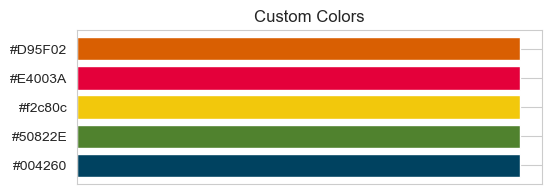

In [89]:
# Plot the individual colors as horizontal bars
plt.figure(figsize=(6, 2))
for i, color in enumerate(CUSTOM_COLORS):
    plt.barh(y=i, width=1, color=color)
plt.yticks(range(len(CUSTOM_COLORS)), CUSTOM_COLORS)
plt.xticks([])
plt.title("Custom Colors")
plt.show()

### Figure: Frequency of speeches by year

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


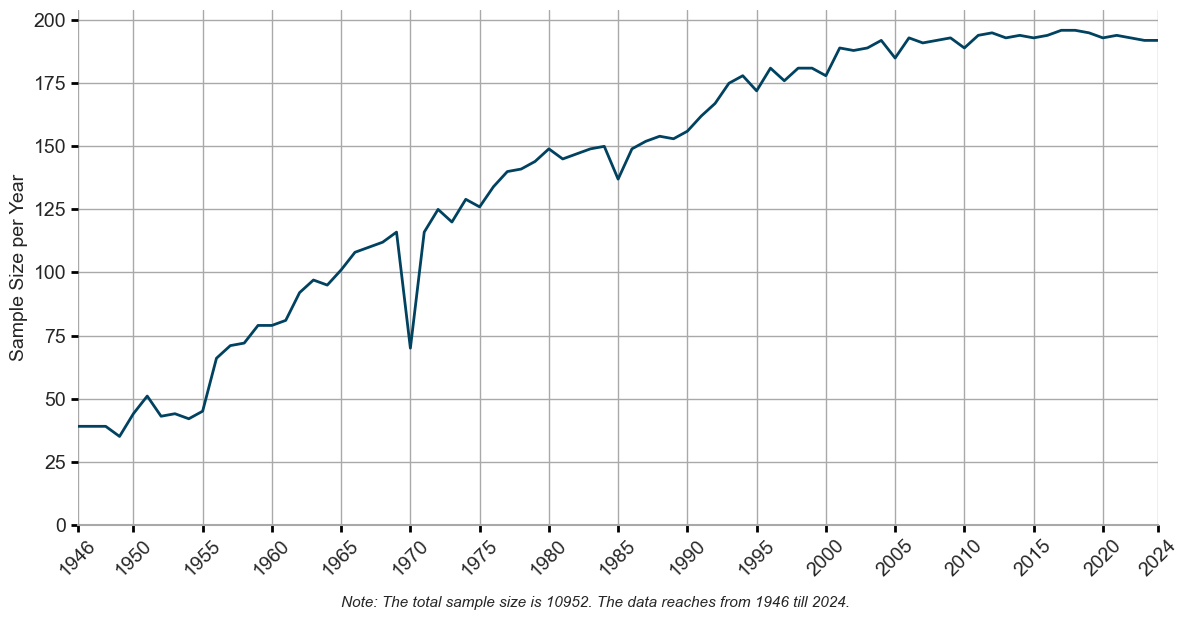

year
1946    39
Name: count, dtype: int64
year
2024    192
Name: count, dtype: int64


In [91]:
# === Overall Sample Size per Year Plot ===

overall_sample_size_per_year = un_corpus_scored['year'].value_counts().sort_index()
overall_total = overall_sample_size_per_year.sum()

fig, ax = plt.subplots(figsize=FIGSIZE)

sns.lineplot(
    x=overall_sample_size_per_year.index,
    y=overall_sample_size_per_year.values,
    marker=MARKER,
    color=CUSTOM_COLORS[0],
    linewidth=LINEWIDTH,
    ax=ax
)

# Labels
ax.set_xlabel("")
ax.set_ylabel("Sample Size per Year", fontsize=AXIS_LABEL_FONT_SIZE)

# Y-axis limits and margins
ax.set_ylim(bottom=AX_SET_YLIM)
ax.margins(y=AX_SET_Y_MARGIN)

# X-axis: fixed range and major ticks
ax.set_xlim(1946, 2024)
ax.set_xticks(TICK_YEARS)
ax.set_xticklabels(TICK_YEARS, rotation=XTICK_ROTATION)

# Tick parameters — force them to appear
ax.tick_params(
    axis='x', which='both', bottom=True, top=False,
    direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH, color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE
)
ax.tick_params(
    axis='y', which='both', left=True, right=False,
    direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH, color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE
)

# Spines
ax.spines['left'].set_color(SPINE_COLOR)
ax.spines['left'].set_linewidth(SPINE_WIDTH)
ax.spines['bottom'].set_color(SPINE_COLOR)
ax.spines['bottom'].set_linewidth(SPINE_WIDTH)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Grid lines
ax.yaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)
ax.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)

# Despine
sns.despine(**DESPINE_SETTINGS)

# Optional note under the plot
plt.figtext(
    0.5, -0.02,
    f"Note: The total sample size is {overall_total}. The data reaches from 1946 till 2024.",
    **FIG_NOTE_FONT
)

plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'frequency_by_year.png'), bbox_inches='tight')
plt.show()

# Get the first and last value
pd.set_option('display.max_rows', None)
overall_sample_size_per_year

# Show only the first and last year
print(overall_sample_size_per_year.head(1))
print(overall_sample_size_per_year.tail(1))

# Reset the display option to original
pd.reset_option('display.max_rows')

### Figure: Frequency of speeches by country

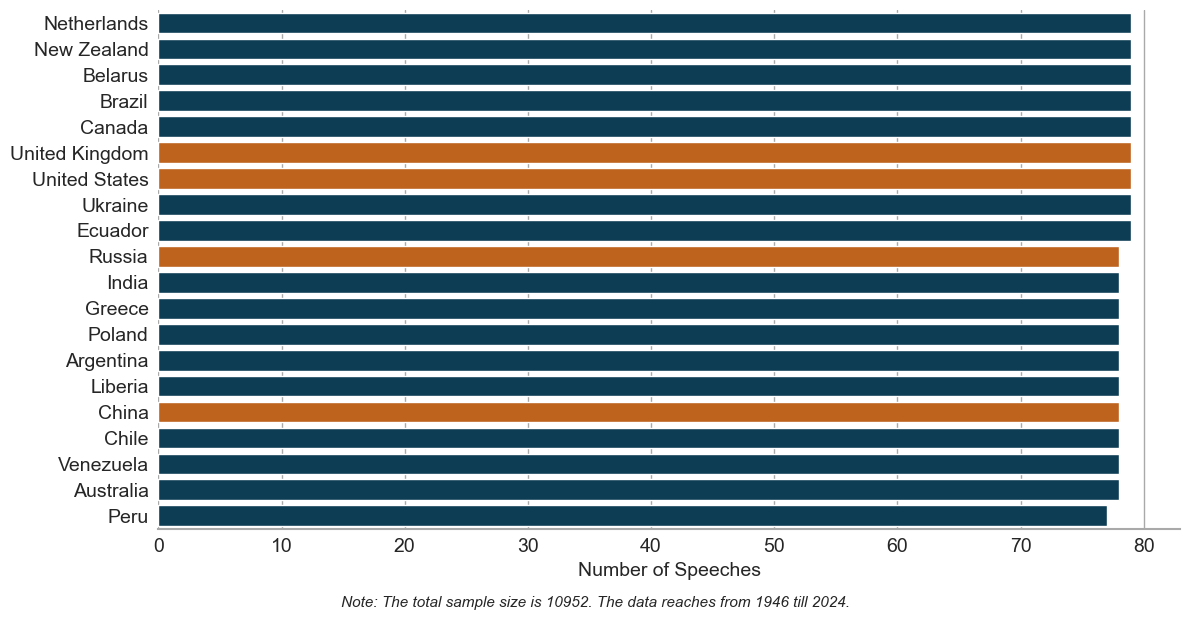

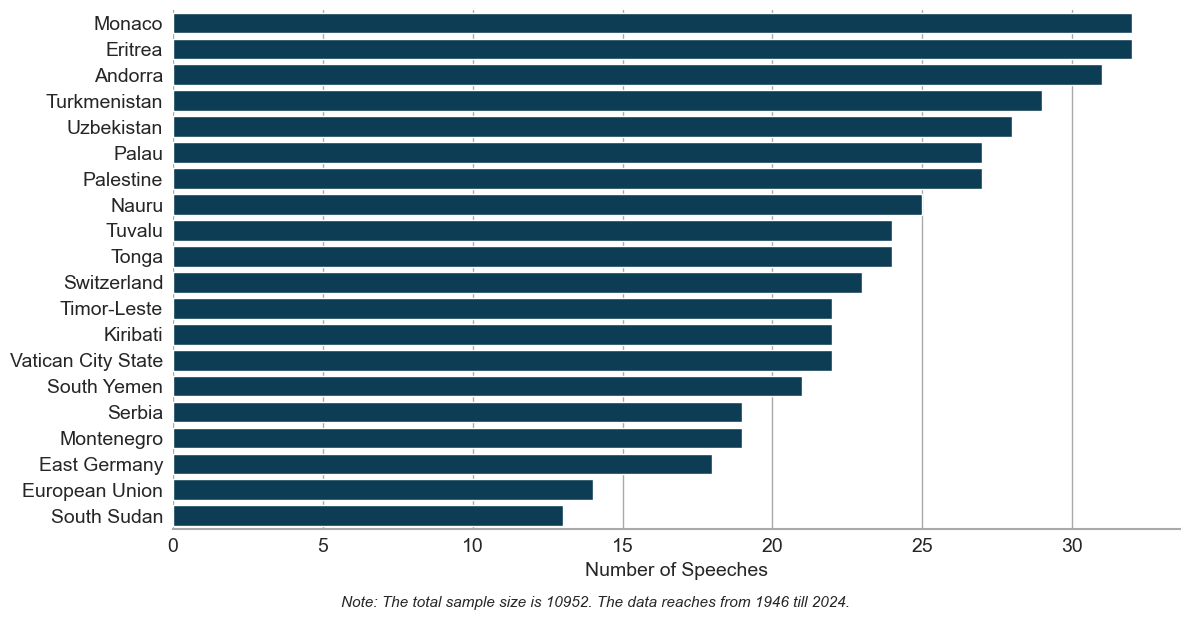

In [93]:
# === Graph 1: Top 20 Countries by Frequency ===

top_countries = un_corpus_scored['country_name'].value_counts().nlargest(20)

# Get security council status for top countries
country_security_status = (
    un_corpus_scored.groupby('country_name')['security_council_permanent']
    .agg(lambda x: x.mode()[0] if not x.mode().empty else 0)
    .reindex(top_countries.index)
)

# Assign colors: orange if permanent member of security council, blue otherwise
colors_barchart_sec_council = ['#D95F02' if status == 1 else '#004260' for status in country_security_status]

plt.figure(figsize=FIGSIZE) 
sns.barplot(x=top_countries.values, y=top_countries.index, palette=colors_barchart_sec_council)

# Axis labels and ticks
plt.xlabel("Number of Speeches", fontsize=AXIS_LABEL_FONT_SIZE)
plt.ylabel("")
plt.xticks(fontsize=TICK_LABEL_FONT_SIZE)
plt.yticks(fontsize=TICK_LABEL_FONT_SIZE)

# Apply global despine settings
sns.despine(**DESPINE_SETTINGS)

# Thicker spines
ax = plt.gca()
for spine in ['left', 'bottom']:
    ax.spines[spine].set_color(SPINE_COLOR)
    ax.spines[spine].set_linewidth(SPINE_WIDTH)

# Grid lines
ax.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)

# Add note below
plt.figtext(
    0.5, -0.02,
    f"Note: The total sample size is {overall_total}. The data reaches from 1946 till 2024.",
    **FIG_NOTE_FONT
)

plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'top_20_countries_by_frequency.png'), bbox_inches='tight')
plt.show()


# === Graph 2: Bottom 20 Countries by Frequency ===

bottom_countries = un_corpus_scored['country_name'].value_counts().nsmallest(20)
bottom_countries = bottom_countries.sort_values(ascending=False)

plt.figure(figsize=FIGSIZE)
sns.barplot(x=bottom_countries.values, y=bottom_countries.index, color=CUSTOM_COLORS[0])

# Axis labels and ticks
plt.xlabel("Number of Speeches", fontsize=AXIS_LABEL_FONT_SIZE)
plt.ylabel("")
plt.xticks(fontsize=TICK_LABEL_FONT_SIZE)
plt.yticks(fontsize=TICK_LABEL_FONT_SIZE)

# Apply global despine settings
sns.despine(**DESPINE_SETTINGS)

# Thicker spines
ax = plt.gca()
for spine in ['left', 'bottom']:
    ax.spines[spine].set_color(SPINE_COLOR)
    ax.spines[spine].set_linewidth(SPINE_WIDTH)

# Grid lines
ax.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)

# Add note below
plt.figtext(
    0.5, -0.02,
    f"Note: The total sample size is {overall_total}. The data reaches from 1946 till 2024.",
    **FIG_NOTE_FONT
)

plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'bottom_20_countries_by_frequency.png'), bbox_inches='tight')
plt.show()

### Figure: Length of Speeches over time (BEOFRE PREPROCESSING)

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

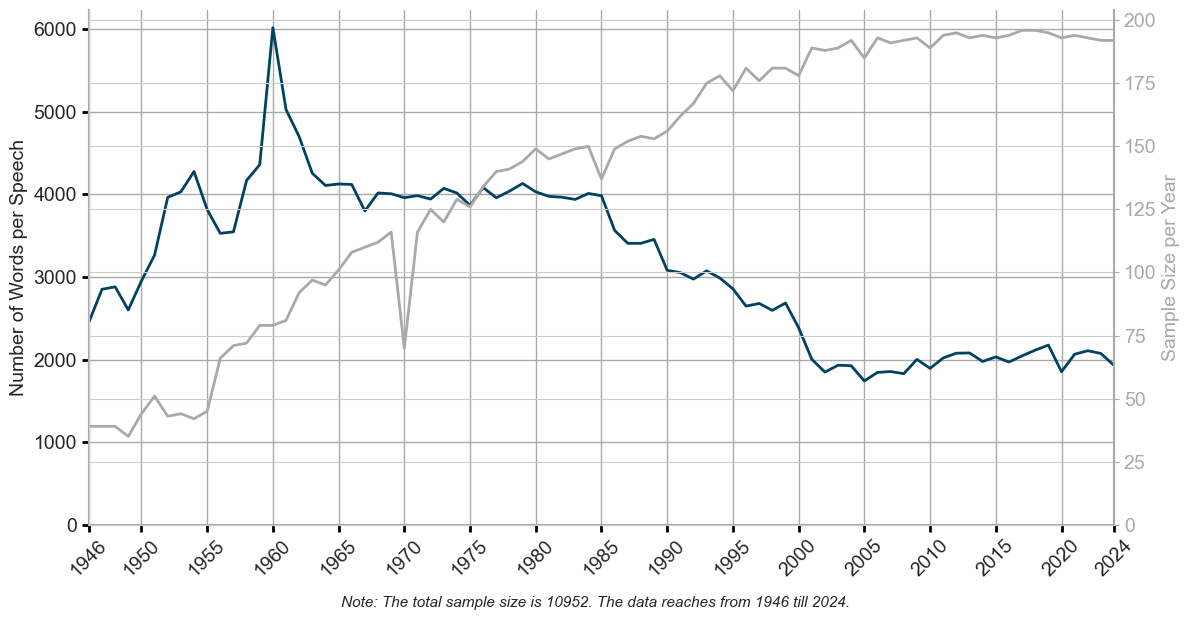

In [95]:
# === Average Speech Length per Year Plot ===

speech_length_words = un_corpus_scored.groupby("year")["speech_length_words"].mean()

fig, ax1 = plt.subplots(figsize=FIGSIZE)

# Left y-axis: average number of words
sns.lineplot(
    x=speech_length_words.index,
    y=speech_length_words.values,
    color=CUSTOM_COLORS[0], 
    linewidth=LINEWIDTH,
    ax=ax1
)

# Labels
ax1.set_xlabel("")
ax1.set_ylabel("Number of Words per Speech", fontsize=AXIS_LABEL_FONT_SIZE)

# Tick label font size
ax1.tick_params(labelsize=TICK_LABEL_FONT_SIZE)

# Y-axis limits and margins
ax1.set_ylim(bottom=AX_SET_YLIM)
ax1.margins(y=AX_SET_Y_MARGIN)

# X-axis: fixed range and ticks
ax1.set_xlim(1946, 2024)
ax1.set_xticks(TICK_YEARS)
ax1.set_xticklabels(TICK_YEARS, rotation=XTICK_ROTATION)

# Tick parameters
ax1.tick_params(
    axis='x', which='both', bottom=True, top=False,
    direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH, color=TICK_COLOR
)
ax1.tick_params(
    axis='y', which='both', left=True, right=False,
    direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH, color=TICK_COLOR
)

# Spines for left y-axis
ax1.spines['left'].set_color(SPINE_COLOR)
ax1.spines['left'].set_linewidth(SPINE_WIDTH)
ax1.spines['bottom'].set_color(SPINE_COLOR)
ax1.spines['bottom'].set_linewidth(SPINE_WIDTH)
ax1.spines['top'].set_visible(False)

# Grid lines
ax1.yaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)
ax1.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)

# === Right y-axis: sample size in dark grey ===
ax2 = ax1.twinx()
sns.lineplot(
    x=overall_sample_size_per_year.index,
    y=overall_sample_size_per_year.values,
    color='darkgrey',
    linewidth=LINEWIDTH,
    ax=ax2
)
ax2.set_ylabel("Sample Size per Year", color='darkgrey', fontsize=AXIS_LABEL_FONT_SIZE)
ax2.tick_params(axis='y', colors='darkgrey', labelsize=TICK_LABEL_FONT_SIZE)
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

# Right spine
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color(SPINE_COLOR)
ax2.spines['right'].set_linewidth(SPINE_WIDTH)

# Despine (keep top hidden)
sns.despine(left=False, right=False, top=True, bottom=False)

# Note
plt.figtext(
    0.5, -0.02,
    f"Note: The total sample size is {overall_total}. The data reaches from 1946 till 2024.",
    **FIG_NOTE_FONT
)

# Layout & save
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'speech_length_by_year.png'), bbox_inches='tight')
plt.show()


### Figure: Longest and Shortest Speeches by Word Count BEFORE PREPROCESSING

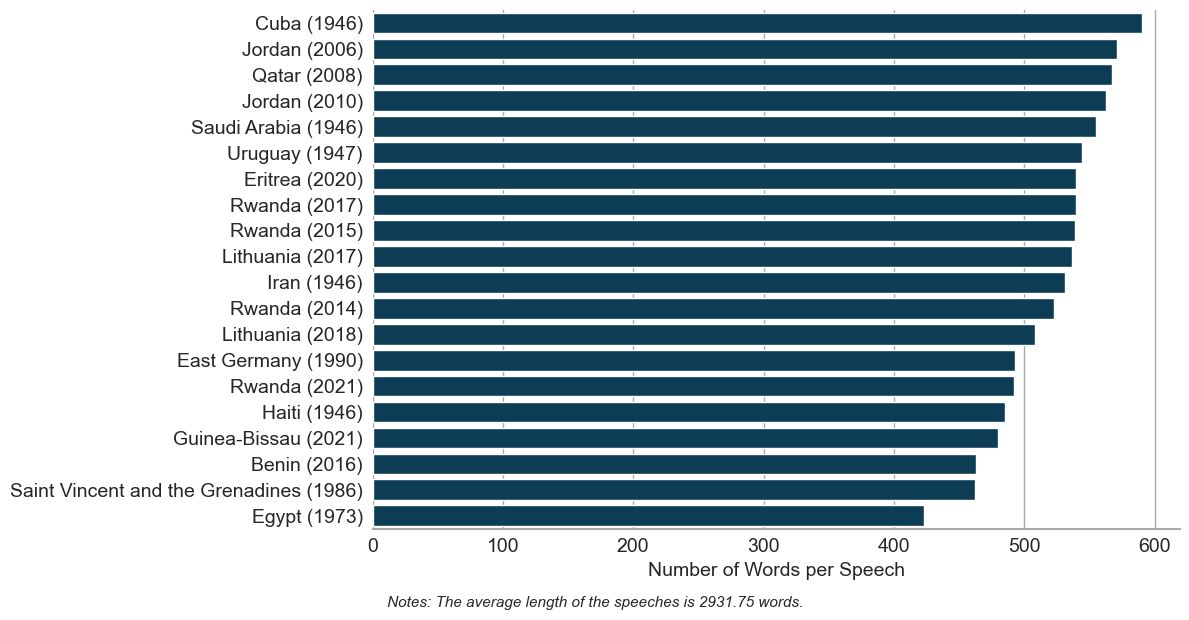

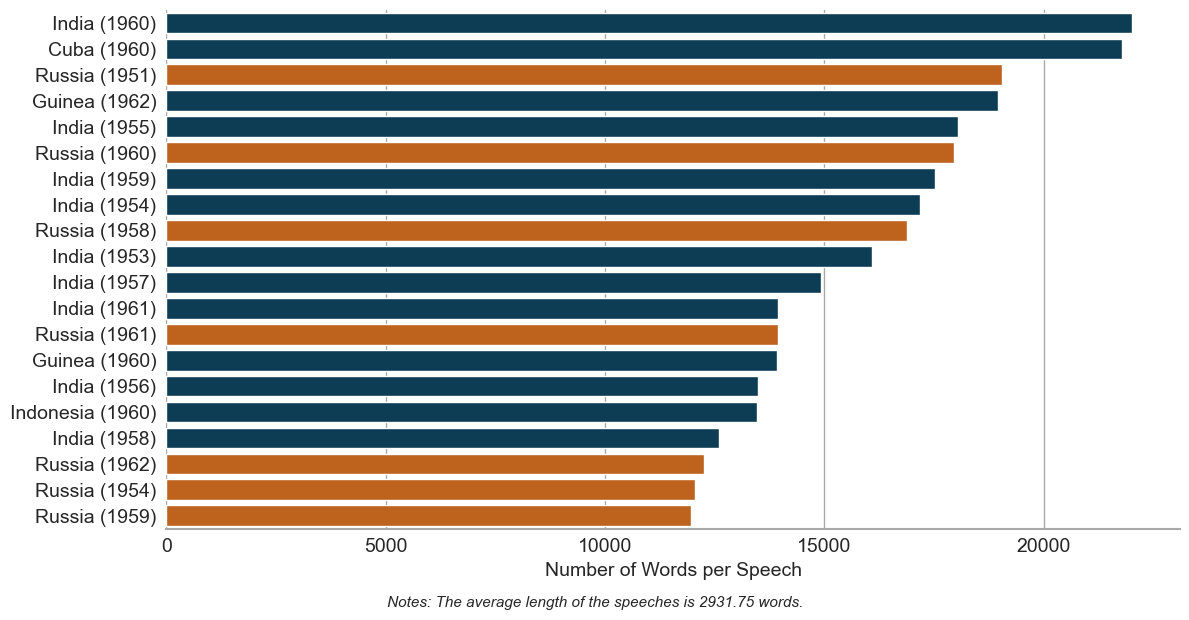

In [97]:
# === Graph 1: 20 Shortest Speeches ===
shortest_speeches = (
    un_corpus_scored.nsmallest(20, 'speech_length_words')
    .sort_values(by='speech_length_words', ascending=False)
    [['speech_label', 'speech_length_words']]
)

plt.figure(figsize=FIGSIZE)
sns.barplot(
    data=shortest_speeches,
    x='speech_length_words',
    y='speech_label',
    color=CUSTOM_COLORS[0]  # consistent blue
)

# Labels
plt.xlabel("Number of Words per Speech", fontsize=AXIS_LABEL_FONT_SIZE)
plt.ylabel("")

# Tick label font size
plt.xticks(fontsize=TICK_LABEL_FONT_SIZE)
plt.yticks(fontsize=TICK_LABEL_FONT_SIZE)

# Spines & grid lines
ax = plt.gca()
for spine in ['left', 'bottom']:
    ax.spines[spine].set_color(SPINE_COLOR)
    ax.spines[spine].set_linewidth(SPINE_WIDTH)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)

sns.despine(**DESPINE_SETTINGS)
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)

# === Note ===
plt.figtext(
    0.5, -0.02,
    f"Notes: The average length of the speeches is 2931.75 words.",
     **FIG_NOTE_FONT
)

plt.savefig(os.path.join(fig_dir, '20_shortest_speeches.png'), bbox_inches='tight')
plt.show()


# === Graph 2: 20 Longest Speeches ===
longest_speeches = (
    un_corpus_scored.nlargest(20, 'speech_length_words')
    .sort_values(by='speech_length_words', ascending=False)
    [['speech_label', 'speech_length_words', 'country_name', 'security_council_permanent']]
)

# Assign colors: orange if permanent member of security council, blue otherwise
colors_longest_speeches = [
    '#D95F02' if status == 1 else '#004260' 
    for status in longest_speeches['security_council_permanent']
]

plt.figure(figsize=FIGSIZE)
sns.barplot(
    data=longest_speeches,
    x='speech_length_words',
    y='speech_label',
    palette=colors_longest_speeches
)

# Labels
plt.xlabel("Number of Words per Speech", fontsize=AXIS_LABEL_FONT_SIZE)
plt.ylabel("")

# Tick label font size
plt.xticks(fontsize=TICK_LABEL_FONT_SIZE)
plt.yticks(fontsize=TICK_LABEL_FONT_SIZE)

# Spines & grid lines
ax = plt.gca()
for spine in ['left', 'bottom']:
    ax.spines[spine].set_color(SPINE_COLOR)
    ax.spines[spine].set_linewidth(SPINE_WIDTH)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)

sns.despine(**DESPINE_SETTINGS)
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)

# === Note ===
plt.figtext(
    0.5, -0.02,
    f"Notes: The average length of the speeches is 2931.75 words.",
     **FIG_NOTE_FONT
)

plt.savefig(os.path.join(fig_dir, '20_longest_speeches.png'), bbox_inches='tight')
plt.show()


### Figure: Percentage of Speeches from Countries with English as Official Language

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


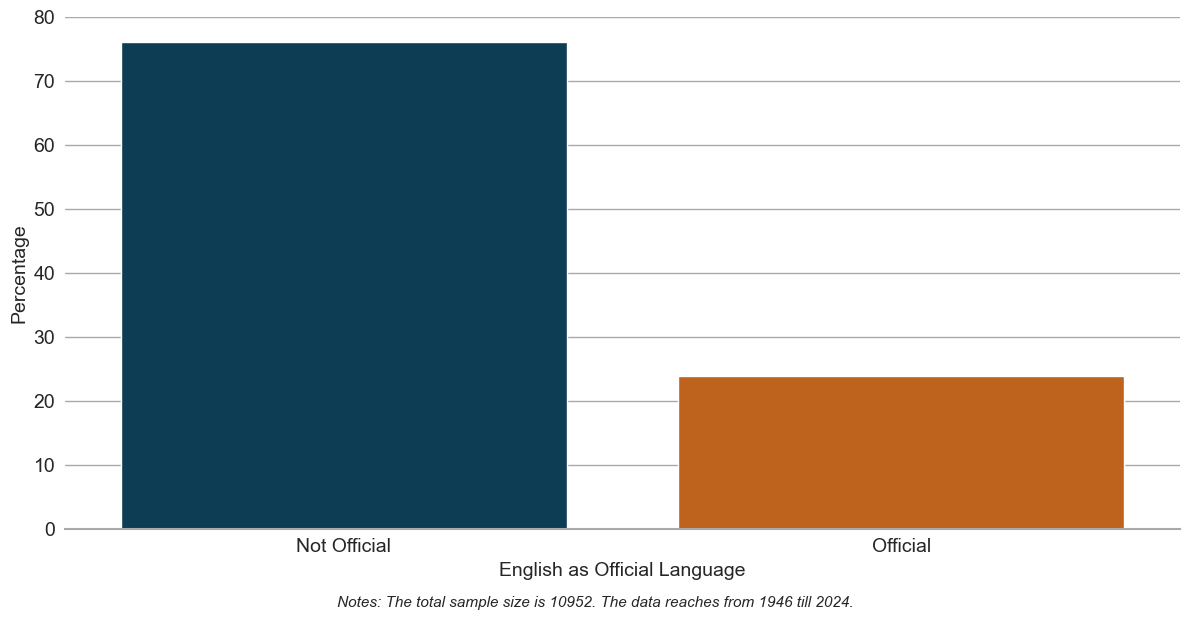

In [99]:
# === Share of English as Official Language ===

# Count and normalize to get percentages
official_language_percent = (
    un_corpus_scored['english_official_language']
    .value_counts(normalize=True)
    .sort_index() * 100
)

official_language_sample_size_per_year = un_corpus_scored.groupby('year')['english_official_language'].count()
official_language_total = official_language_sample_size_per_year.sum()

# Define labels
eng_labels = ['Not Official', 'Official']

# Plot
plt.figure(figsize=FIGSIZE)
sns.barplot(
    x=eng_labels,
    y=official_language_percent.values,
    palette=[CUSTOM_COLORS[0], CUSTOM_COLORS[4]]  # consistent color scheme
)

# Labels
plt.xlabel("English as Official Language", fontsize=AXIS_LABEL_FONT_SIZE)
plt.ylabel("Percentage", fontsize=AXIS_LABEL_FONT_SIZE)

# Tick labels
plt.xticks(fontsize=TICK_LABEL_FONT_SIZE)
plt.yticks(fontsize=TICK_LABEL_FONT_SIZE)

# Y-axis limit
plt.ylim(0, 80)

# Spines & grid lines
ax = plt.gca()
for spine in ['left', 'bottom']:
    ax.spines[spine].set_color(SPINE_COLOR)
    ax.spines[spine].set_linewidth(SPINE_WIDTH)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)

# Despine & layout
sns.despine(**DESPINE_SETTINGS)
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)

# Note below
plt.figtext(
    0.5, -0.02,
    f"Notes: The total sample size is {official_language_total}. The data reaches from 1946 till 2024.",
    **FIG_NOTE_FONT
)

# Save and show
plt.savefig(os.path.join(fig_dir, 'share_english_official_language.png'), bbox_inches='tight')
plt.show()


### Figure: Share of female speakers

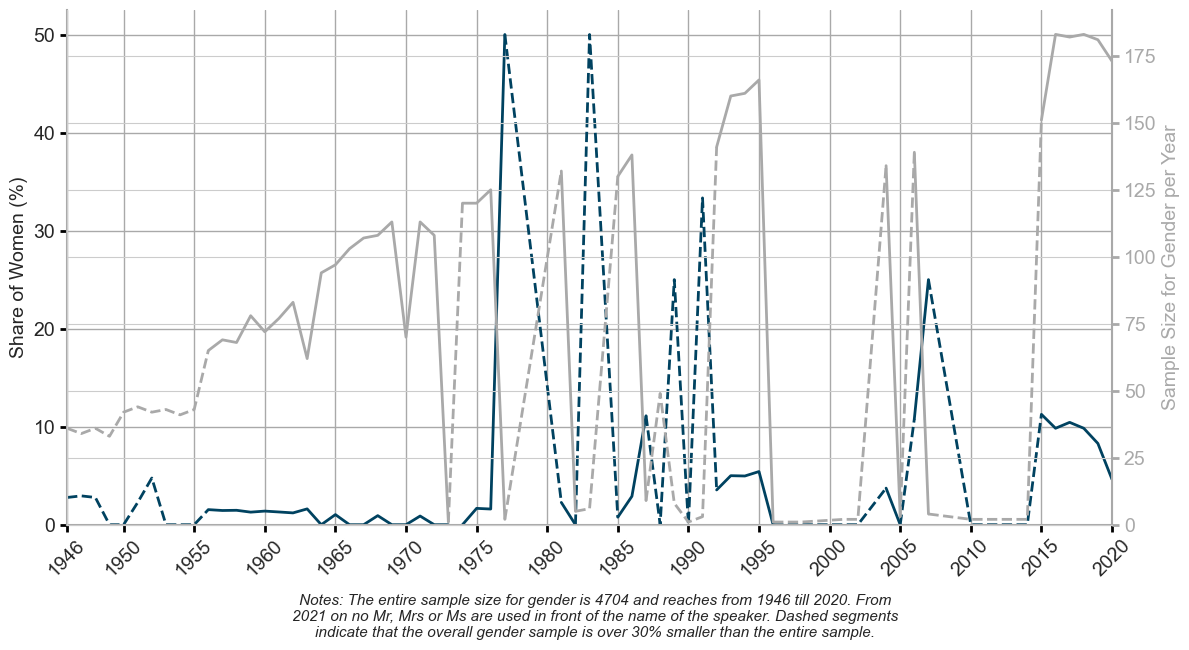

In [101]:
# === Share of Female Speakers by Year ===

# Filter to only 0 and 1 (exclude NaNs)
df_gender = un_corpus_scored[un_corpus_scored['gender_dummy'].isin([0, 1])]

# Percentage share of women per year
female_percent = df_gender.groupby('year')['gender_dummy'].mean() * 100

# Sample size per year
gender_sample_size_per_year = df_gender.groupby('year')['gender_dummy'].count()

# Total sample size included in the plot
gender_total = gender_sample_size_per_year.sum()

# Threshold for dotted line: 20% of overall sample
threshold = 0.3 * overall_sample_size_per_year.max()

# Function to plot conditional line (solid if >= threshold, dashed if < threshold)
def plot_conditional_line(ax, x, y, reference, threshold, color, linewidth=LINEWIDTH):
    """
    reference: array used to determine when to switch between solid and dashed
    """
    x, y, reference = list(x), list(y), list(reference)
    start_idx = 0
    current_style = '-' if reference[0] >= threshold else '--'

    for i in range(1, len(y)):
        new_style = '-' if reference[i] >= threshold else '--'
        if new_style != current_style:
            ax.plot(x[start_idx:i+1], y[start_idx:i+1],
                    color=color, linewidth=linewidth, linestyle=current_style)
            start_idx = i
            current_style = new_style
    ax.plot(x[start_idx:], y[start_idx:], color=color, linewidth=linewidth, linestyle=current_style)

# --- Plot setup ---
fig, ax1 = plt.subplots(figsize=FIGSIZE)

# --- Left y-axis: Percentage of Women (depends on sample size) ---
x = female_percent.index
y = female_percent.values
ref = gender_sample_size_per_year.reindex(x).fillna(0).values  # ensure same index

plot_conditional_line(
    ax1, x, y, reference=ref, threshold=threshold,
    color=CUSTOM_COLORS[0], linewidth=LINEWIDTH
)

# === Axis Labels ===
ax1.set_xlabel("")
ax1.set_ylabel("Share of Women (%)", fontsize=AXIS_LABEL_FONT_SIZE)
ax1.set_ylim(bottom=AX_SET_YLIM)
ax1.margins(y=AX_SET_Y_MARGIN)

# === X-Axis Settings ===
ax1.set_xlim(1946, 2020)
tick_years = [1946] + list(range(1950, 2021, 5))
if 2020 not in tick_years:
    tick_years.append(2020)

ax1.set_xticks(tick_years)
ax1.set_xticklabels(tick_years, rotation=XTICK_ROTATION, fontsize=TICK_LABEL_FONT_SIZE)

# === Tick Parameters ===
ax1.tick_params(
    axis='y', which='both', left=True, right=False,
    direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH,
    color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE
)
ax1.tick_params(
    axis='x', which='both', bottom=True, top=False,
    direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH,
    color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE
)

# === Spines (Left Axis) ===
ax1.spines['left'].set_color(SPINE_COLOR)
ax1.spines['left'].set_linewidth(SPINE_WIDTH)
ax1.spines['bottom'].set_color(SPINE_COLOR)
ax1.spines['bottom'].set_linewidth(SPINE_WIDTH)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# === Grid Lines ===
ax1.yaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)
ax1.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)

# --- Right y-axis: Sample size per year ---
ax2 = ax1.twinx()
x2 = gender_sample_size_per_year.index
y2 = gender_sample_size_per_year.values

plot_conditional_line(
    ax2, x2, y2, reference=y2, threshold=threshold,
    color='darkgrey', linewidth=LINEWIDTH
)

ax2.set_ylabel("Sample Size for Gender per Year", color='darkgrey', fontsize=AXIS_LABEL_FONT_SIZE)
ax2.tick_params(
    axis='y', colors='darkgrey', direction=TICK_DIRECTION,
    length=TICK_LENGTH, width=TICK_WIDTH, labelsize=TICK_LABEL_FONT_SIZE
)
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color(SPINE_COLOR)
ax2.spines['right'].set_linewidth(SPINE_WIDTH)
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

# === Despine & Layout ===
sns.despine(left=False, right=False, top=True, bottom=False)

# === Note below the plot ===

note_text = (
    f"Notes: The entire sample size for gender is {gender_total} and reaches from 1946 till 2020. "
    f"From 2021 on no Mr, Mrs or Ms are used in front of the name of the speaker. "
    f"Dashed segments indicate that the overall gender sample is over 30% smaller than the entire sample."
)
wrapped_text = "\n".join(textwrap.wrap(note_text, width=90))
plt.figtext(0.5, -0.07, wrapped_text, **FIG_NOTE_FONT)

# === Save & Show ===
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'share_female_speakers_by_year.png'), bbox_inches='tight')
plt.show()

### Figure: Share of position by speakers

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

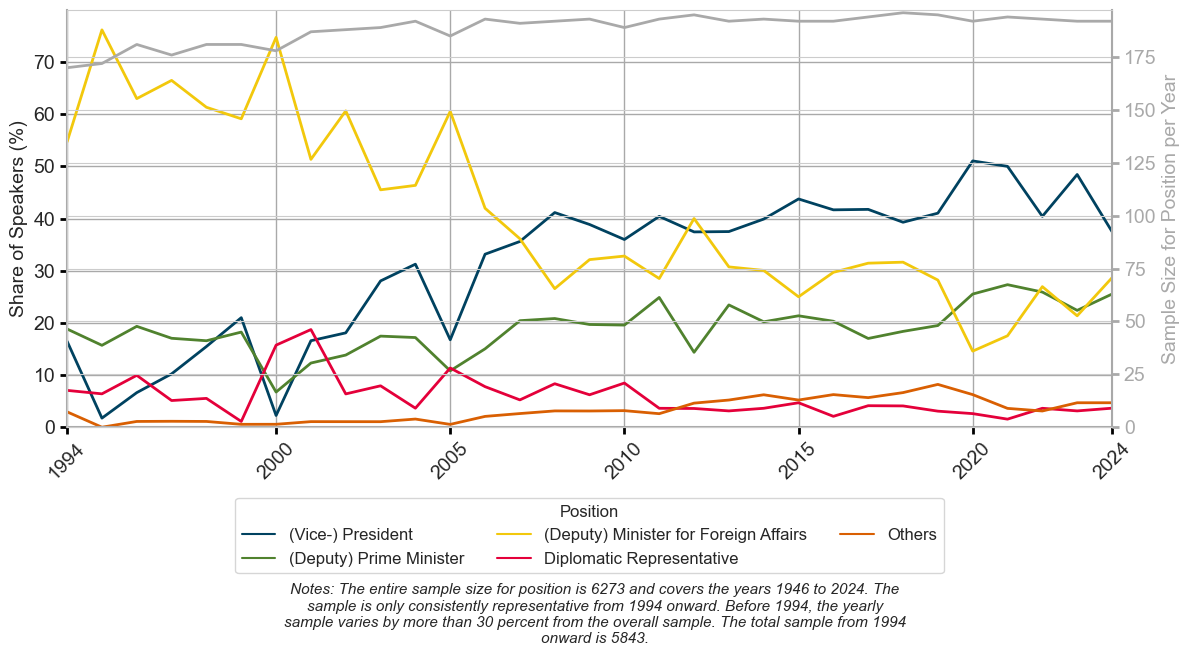

In [103]:
merge_to_others = ["Head of State", "Monarch", "Head of Government"]
un_corpus_scored["position"] = un_corpus_scored["position"].replace(merge_to_others, "Others")

# Counts per year and position
position_counts = (
    un_corpus_scored.groupby(['year', 'position'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

# Sample size per year (positions subset)
position_sample_size_per_year = position_counts.sum(axis=1)
position_total = position_sample_size_per_year.sum()

# Threshold for representativeness 
representative_ratio = position_sample_size_per_year / overall_sample_size_per_year
first_representative_year = representative_ratio[representative_ratio >= 0.70].index.min()

# Filter data from first representative year onward
position_counts = position_counts.loc[position_counts.index >= first_representative_year]
position_sample_size_per_year = position_sample_size_per_year.loc[position_sample_size_per_year.index >= first_representative_year]

# Percentages per year per position
position_percentage = position_counts.div(position_counts.sum(axis=1), axis=0) * 100

# Representative Sample Size
position_sample_size_representative = position_sample_size_per_year.loc[position_sample_size_per_year.index >= 1994]
position_total_representative = position_sample_size_representative.sum()


top_positions = [
    '(Vice-) President', 
    '(Deputy) Prime Minister', 
    '(Deputy) Minister for Foreign Affairs', 
    'Diplomatic Representative', 
    'Others'
]
position_percentage = position_percentage[top_positions].fillna(0)

position_percentage_long = (
    position_percentage
    .reset_index()
    .melt(id_vars="year", var_name="position", value_name="percentage")
)

fig, ax1 = plt.subplots(figsize=FIGSIZE)

sns.lineplot(
    data=position_percentage_long,
    x="year",
    y="percentage",
    hue="position",
    palette=CUSTOM_COLORS,
    linewidth=LINEWIDTH,
    ax=ax1
)

ax1.set_ylabel("Share of Speakers (%)", fontsize=AXIS_LABEL_FONT_SIZE)
ax1.set_xlabel("")

ax1.tick_params(
    axis='y',
    direction=TICK_DIRECTION,
    length=TICK_LENGTH,
    width=TICK_WIDTH,
    color=TICK_COLOR,
    labelsize=TICK_LABEL_FONT_SIZE
)
ax1.tick_params(
    axis='x',
    which='both',
    bottom=True,
    top=False,
    direction=TICK_DIRECTION,
    length=TICK_LENGTH,
    width=TICK_WIDTH,
    color=TICK_COLOR,
    labelsize=TICK_LABEL_FONT_SIZE
)

ax1.spines['left'].set_color(SPINE_COLOR)
ax1.spines['left'].set_linewidth(SPINE_WIDTH)
ax1.spines['bottom'].set_color(SPINE_COLOR)
ax1.spines['bottom'].set_linewidth(SPINE_WIDTH)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.yaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)
ax1.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)
sns.despine(left=False, right=False, top=True, bottom=False)

ax1.set_ylim(bottom=0)

ax2 = ax1.twinx()
sns.lineplot(
    x=position_sample_size_per_year.index,
    y=position_sample_size_per_year.values,
    color="darkgrey",
    linewidth=LINEWIDTH,
    ax=ax2
)

ax2.set_ylabel("Sample Size for Position per Year", color="darkgrey", fontsize=AXIS_LABEL_FONT_SIZE)
ax2.tick_params(
    axis='y',
    colors='darkgrey',
    direction=TICK_DIRECTION,
    length=TICK_LENGTH,
    width=TICK_WIDTH,
    labelsize=TICK_LABEL_FONT_SIZE
)
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color(SPINE_COLOR)
ax2.spines['right'].set_linewidth(SPINE_WIDTH)
ax2.set_ylim(bottom=0)

x_start = max(first_representative_year, 1994)
ax1.set_xlim(x_start, 2024)
xtick_years = [2000, 1994] + list(range(2000, 2025, 5))
xtick_years = sorted(set(xtick_years + [2024]))
#xtick_years = list(range(1994, 2025, 5))
ax1.set_xticks(xtick_years)
ax1.set_xticklabels(xtick_years, rotation=XTICK_ROTATION, fontsize=TICK_LABEL_FONT_SIZE)

ax1.legend(
    title="Position",
    loc=LEGEND_LOC,
    bbox_to_anchor=LEGEND_BBOX,
    ncol=LEGEND_NCOL,
    fontsize=LEGEND_FONT_SIZE,
    title_fontsize=LEGEND_FONT_SIZE
)

note_text = (
    f"Notes: The entire sample size for position is {position_total} and covers the years 1946 to 2024. "
    f"The sample is only consistently representative from 1994 onward. Before 1994, the yearly sample varies "
    f"by more than 30 percent from the overall sample. The total sample from 1994 onward is {position_total_representative}."
)
wrapped_text = "\n".join(textwrap.wrap(note_text, width=90))
plt.figtext(0.5, -0.08, wrapped_text, **FIG_NOTE_FONT)

plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'share_speaker_positions_by_year_representative_part.png'), bbox_inches='tight')
plt.show()

In [104]:
# Count speeches per year and position
counts_per_year = (
    un_corpus_scored
    .groupby(['year', 'position'])
    .size()
    .reset_index(name='count')
)

# Drop "Others"
#counts_per_year = counts_per_year[counts_per_year['position'] != "Others"]

# Pivot into a wide table for readability
counts_pivot = (
    counts_per_year
    .pivot(index='year', columns='position', values='count')
    .fillna(0)
    .astype(int)
)

# Display nicely
from IPython.display import display
display(counts_pivot)

position  (Deputy) Minister for Foreign Affairs  (Deputy) Prime Minister  \
year                                                                       
1954                                          0                        0   
1959                                          0                        0   
1960                                          0                        6   
1962                                          0                        0   
1963                                          0                        0   
...                                         ...                      ...   
2020                                         28                       49   
2021                                         34                       53   
2022                                         52                       50   
2023                                         41                       43   
2024                                         55                       49   

position  (Vice-) President  Diplomatic Representative  Others  
year                                                            
1954                      0                          0       1  
1959                      0                          0       1  
1960                      7                          0       6  
1962                      2                          0       0  
1963                      1                          0       1  
...                     ...                        ...     ...  
2020                     98                          5      12  
2021                     97                          3       7  
2022                     78                          7       6  
2023                     93                          6       9  
2024                     72                          7       9  

[63 rows x 5 columns]

In [105]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("\nShare of Speaker Positions per Year (in %)\n")
print(position_percentage)


Share of Speaker Positions per Year (in %)

position  (Vice-) President  (Deputy) Prime Minister  \
year                                                   
1994              16.470588                18.823529   
1995               1.744186                15.697674   
1996               6.629834                19.337017   
1997              10.227273                17.045455   
1998              15.469613                16.574586   
1999              20.994475                18.232044   
2000               2.247191                 6.741573   
2001              16.577540                12.299465   
2002              18.085106                13.829787   
2003              28.042328                17.460317   
2004              31.250000                17.187500   
2005              16.756757                10.810811   
2006              33.160622                15.025907   
2007              35.602094                20.418848   
2008              41.145833                20.833333   
200

### Figure: Emotionality Scoring over time

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

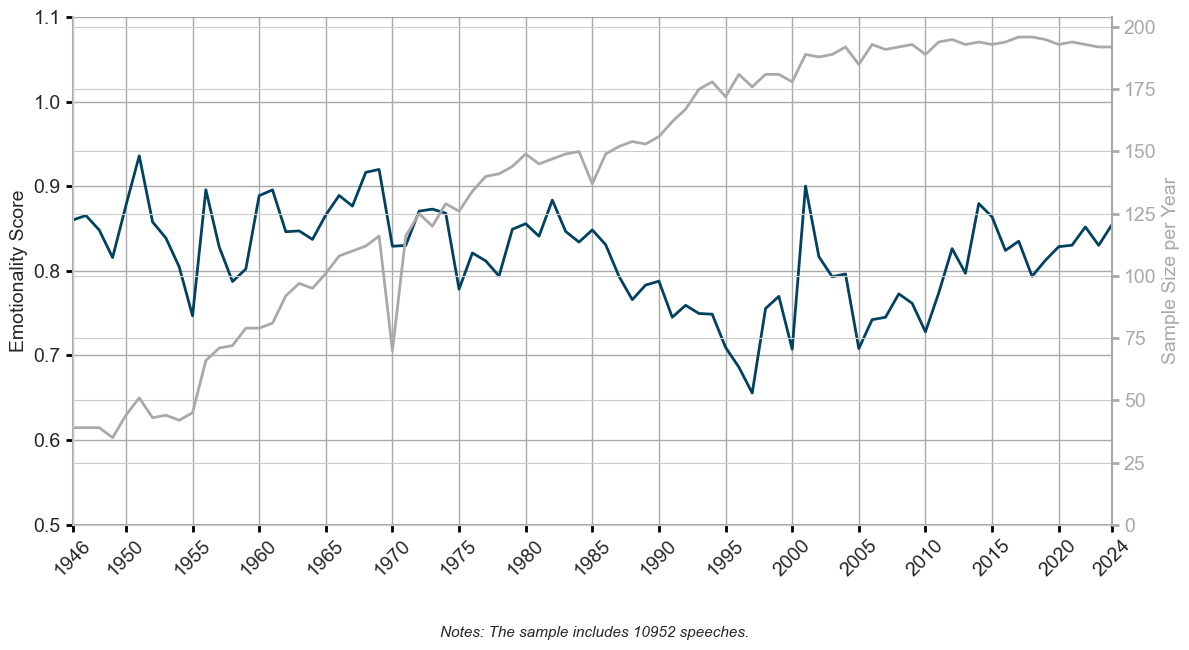

In [107]:
# Mean score per year
score_over_time = un_corpus_scored.groupby('year')['score'].mean()

fig, ax1 = plt.subplots(figsize=FIGSIZE)

x = score_over_time.index
y = score_over_time.values

sns.lineplot(
    x=x,
    y=y,
    marker=MARKER,
    color=CUSTOM_COLORS[0],
    linewidth=LINEWIDTH,
    ax=ax1
)

ax1.set_xlabel("")
ax1.set_ylabel("Emotionality Score", fontsize=AXIS_LABEL_FONT_SIZE)
ax1.set_ylim(Y_RANGE_EMOTIONALITY)
ax1.margins(y=AX_SET_Y_MARGIN)

ax1.set_xlim(1946, 2024)
ax1.set_xticks(TICK_YEARS)
ax1.set_xticklabels(TICK_YEARS, rotation=XTICK_ROTATION, fontsize=TICK_LABEL_FONT_SIZE)

ax1.tick_params(
    axis='y', which='both', left=True, right=False,
    direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH,
    color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE
)
ax1.tick_params(
    axis='x', which='both', bottom=True, top=False,
    direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH,
    color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE
)


ax1.spines['left'].set_color(SPINE_COLOR)
ax1.spines['left'].set_linewidth(SPINE_WIDTH)
ax1.spines['bottom'].set_color(SPINE_COLOR)
ax1.spines['bottom'].set_linewidth(SPINE_WIDTH)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.yaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)
ax1.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)


ax2 = ax1.twinx()
x2 = overall_sample_size_per_year.index
y2 = overall_sample_size_per_year.values

sns.lineplot(
    x=x2,
    y=y2,
    color='darkgrey',
    linewidth=LINEWIDTH,
    ax=ax2
)
ax2.set_ylabel("Sample Size per Year", color='darkgrey', fontsize=AXIS_LABEL_FONT_SIZE)
ax2.tick_params(
    axis='y', colors='darkgrey', direction=TICK_DIRECTION,
    length=TICK_LENGTH, width=TICK_WIDTH, labelsize=TICK_LABEL_FONT_SIZE
)
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color(SPINE_COLOR)
ax2.spines['right'].set_linewidth(SPINE_WIDTH)
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

sns.despine(left=False, right=False, top=True, bottom=False)

note_text = (
    f"Notes: The sample includes {overall_total} speeches."
)
wrapped_text = "\n".join(textwrap.wrap(note_text, width=100))
plt.figtext(0.5, -0.07, wrapped_text, **FIG_NOTE_FONT)

plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'emotionality_score_over_time.png'), bbox_inches='tight')
plt.show()

### Figure: Emotionality by permanent Security Council Membership

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

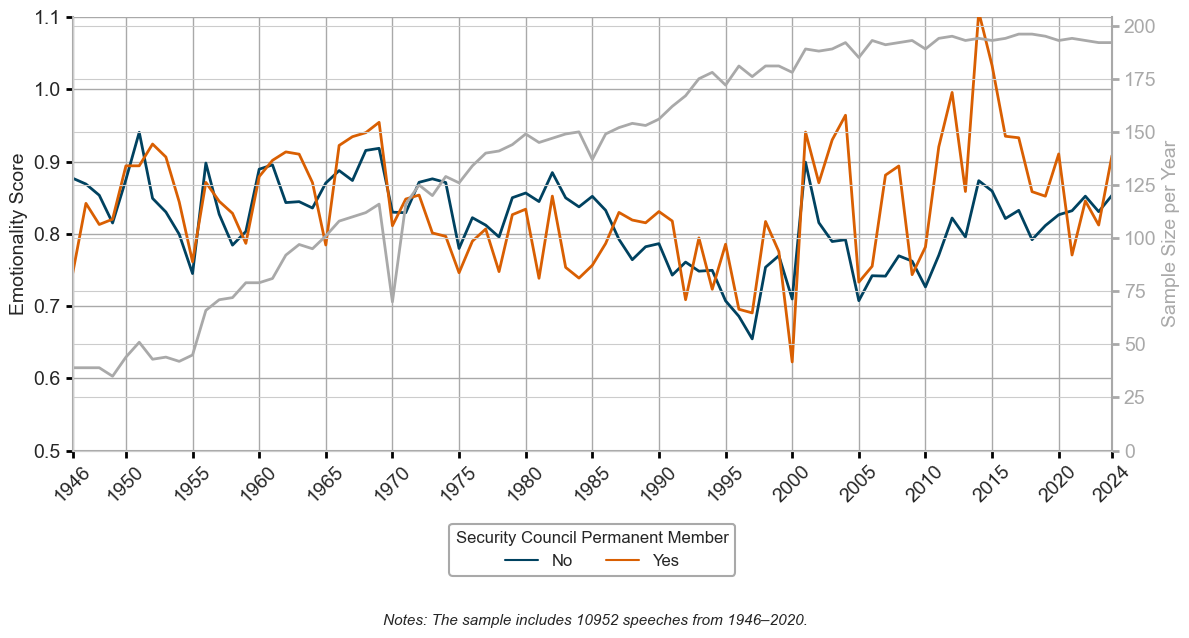

In [122]:
security_council_total = un_corpus_scored['security_council_permanent'].notna().sum()

# Sample size per year (non-missing scores)
security_council_sample_size_per_year = (
    un_corpus_scored.groupby('year')['security_council_permanent'].count()
)

# Mean scores by year and membership
score_over_time_security_council = (
    un_corpus_scored
    .groupby(['year', 'security_council_permanent'])['score']
    .mean()
    .reset_index()
)

score_over_time_security_council['security_council_permanent_label'] = (
    score_over_time_security_council['security_council_permanent']
    .map({0: 'No', 1: 'Yes'})
)

fig, ax1 = plt.subplots(figsize=FIGSIZE)

sns.lineplot(
    data=score_over_time_security_council,
    x='year',
    y='score',
    hue='security_council_permanent_label',
    palette={'No': CUSTOM_COLORS[0], 'Yes': CUSTOM_COLORS[4]},
    linewidth=LINEWIDTH,
    marker=MARKER,
    ax=ax1
)

ax1.set_xlabel("")
ax1.set_ylabel("Emotionality Score", fontsize=AXIS_LABEL_FONT_SIZE)
ax1.set_ylim(Y_RANGE_EMOTIONALITY)
ax1.margins(y=AX_SET_Y_MARGIN)

ax1.set_xlim(1946, 2024)
ax1.set_xticks(TICK_YEARS)
ax1.set_xticklabels(TICK_YEARS, rotation=XTICK_ROTATION, fontsize=TICK_LABEL_FONT_SIZE)

ax1.tick_params(
    axis='y', which='both', left=True, right=False,
    direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH,
    color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE
)
ax1.tick_params(
    axis='x', which='both', bottom=True, top=False,
    direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH,
    color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE
)

ax1.spines['left'].set_color(SPINE_COLOR)
ax1.spines['left'].set_linewidth(SPINE_WIDTH)
ax1.spines['bottom'].set_color(SPINE_COLOR)
ax1.spines['bottom'].set_linewidth(SPINE_WIDTH)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.yaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)
ax1.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)

legend = ax1.legend(
    title="Security Council Permanent Member",
    title_fontsize=LEGEND_FONT_SIZE,
    fontsize=LEGEND_FONT_SIZE,
    loc=LEGEND_LOC,
    bbox_to_anchor=LEGEND_BBOX,
    ncol=LEGEND_NCOL,
    frameon=True,
    edgecolor=SPINE_COLOR,
    facecolor='white'
)
legend.get_frame().set_linewidth(SPINE_WIDTH)
legend.get_frame().set_alpha(1)

ax2 = ax1.twinx()
x2 = security_council_sample_size_per_year.index
y2 = security_council_sample_size_per_year.values

sns.lineplot(
    x=x2,
    y=y2,
    color='darkgrey',
    linewidth=LINEWIDTH,
    ax=ax2
)
ax2.set_ylabel("Sample Size per Year", color='darkgrey', fontsize=AXIS_LABEL_FONT_SIZE)
ax2.tick_params(
    axis='y', colors='darkgrey', direction=TICK_DIRECTION,
    length=TICK_LENGTH, width=TICK_WIDTH, labelsize=TICK_LABEL_FONT_SIZE
)
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color(SPINE_COLOR)
ax2.spines['right'].set_linewidth(SPINE_WIDTH)
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

sns.despine(left=False, right=False, top=True, bottom=False)

note_text = (
    f"Notes: The sample includes {security_council_total} speeches from 1946–2020. "
)
wrapped_text = "\n".join(textwrap.wrap(note_text, width=100))
plt.figtext(0.5, -0.05, wrapped_text, **FIG_NOTE_FONT)

plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(
    os.path.join(fig_dir, 'emotionality_score_over_time_security_council_membership.png'),
    bbox_inches='tight'
)
plt.show()

### Figure: Emotionality Scoring for the permanent members of the security council

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

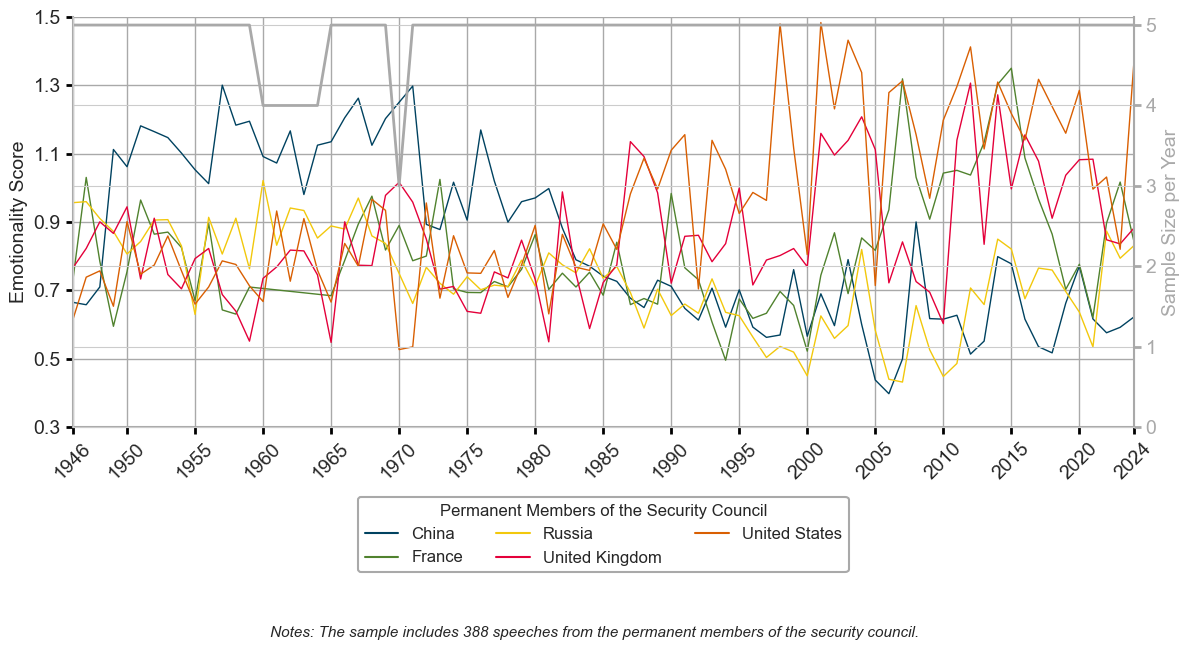

In [124]:
# Filter only Security Council permanent members
permanent_members = un_corpus_scored[un_corpus_scored['security_council_permanent'] == 1]

# Total sample size
permanent_members_total = permanent_members[['score', 'country_name']].dropna().shape[0]

# Sample size per year
permanent_members_sample_size_per_year = permanent_members.groupby('year')['security_council_permanent'].count()

# Mean scores by year and country_name
score_over_time_permanent_members = (
    permanent_members
    .groupby(['year', 'country_name'])['score']
    .mean()
    .reset_index()
)

fig, ax1 = plt.subplots(figsize=FIGSIZE)

sns.lineplot(
    data=score_over_time_permanent_members,
    x='year',
    y='score',
    hue='country_name',
    palette=CUSTOM_COLORS,
    linewidth=1,
    ax=ax1
)

ax1.set_ylabel("Emotionality Score", fontsize=AXIS_LABEL_FONT_SIZE)
ax1.set_xlabel("")
ax1.set_ylim(0.3, 1.5)  # manually set as requested
ax1.set_yticks([0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5])

ax1.set_xlim(1946, 2024)
ax1.set_xticks(TICK_YEARS)
ax1.set_xticklabels(TICK_YEARS, rotation=XTICK_ROTATION, fontsize=TICK_LABEL_FONT_SIZE)

# Tick styling
ax1.tick_params(axis='y', which='both', left=True, right=False,
                direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH,
                color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE)
ax1.tick_params(axis='x', which='both', bottom=True, top=False,
                direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH,
                color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE)

ax1.spines['left'].set_color(SPINE_COLOR)
ax1.spines['left'].set_linewidth(SPINE_WIDTH)
ax1.spines['bottom'].set_color(SPINE_COLOR)
ax1.spines['bottom'].set_linewidth(SPINE_WIDTH)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.yaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)
ax1.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)

ax2 = ax1.twinx()
x2, y2 = permanent_members_sample_size_per_year.index, permanent_members_sample_size_per_year.values
sns.lineplot(x=x2, y=y2, color='darkgrey', linewidth=LINEWIDTH, ax=ax2)

ax2.set_ylabel("Sample Size per Year", color='darkgrey', fontsize=AXIS_LABEL_FONT_SIZE)
ax2.tick_params(axis='y', colors='darkgrey', direction=TICK_DIRECTION,
                length=TICK_LENGTH, width=TICK_WIDTH, labelsize=TICK_LABEL_FONT_SIZE)
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color(SPINE_COLOR)
ax2.spines['right'].set_linewidth(SPINE_WIDTH)
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

legend = ax1.legend(
    title="Permanent Members of the Security Council",
    title_fontsize=LEGEND_FONT_SIZE,
    fontsize=LEGEND_FONT_SIZE,
    loc=LEGEND_LOC,
    bbox_to_anchor=LEGEND_BBOX,
    ncol=LEGEND_NCOL,
    frameon=True,
    edgecolor=SPINE_COLOR,
    facecolor='white'
)
legend.get_frame().set_linewidth(SPINE_WIDTH)
legend.get_frame().set_alpha(1)

sns.despine(left=False, right=False, top=True, bottom=False)

note_text = f"Notes: The sample includes {permanent_members_total} speeches from the permanent members of the security council."
wrapped_text = "\n".join(textwrap.wrap(note_text, width=100))
plt.figtext(0.5, -0.07, wrapped_text, **FIG_NOTE_FONT)

plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'emotionality_score_over_time_permanent_members.png'), bbox_inches='tight')
plt.show()


### Figure: Emotionality Scoring by Gender

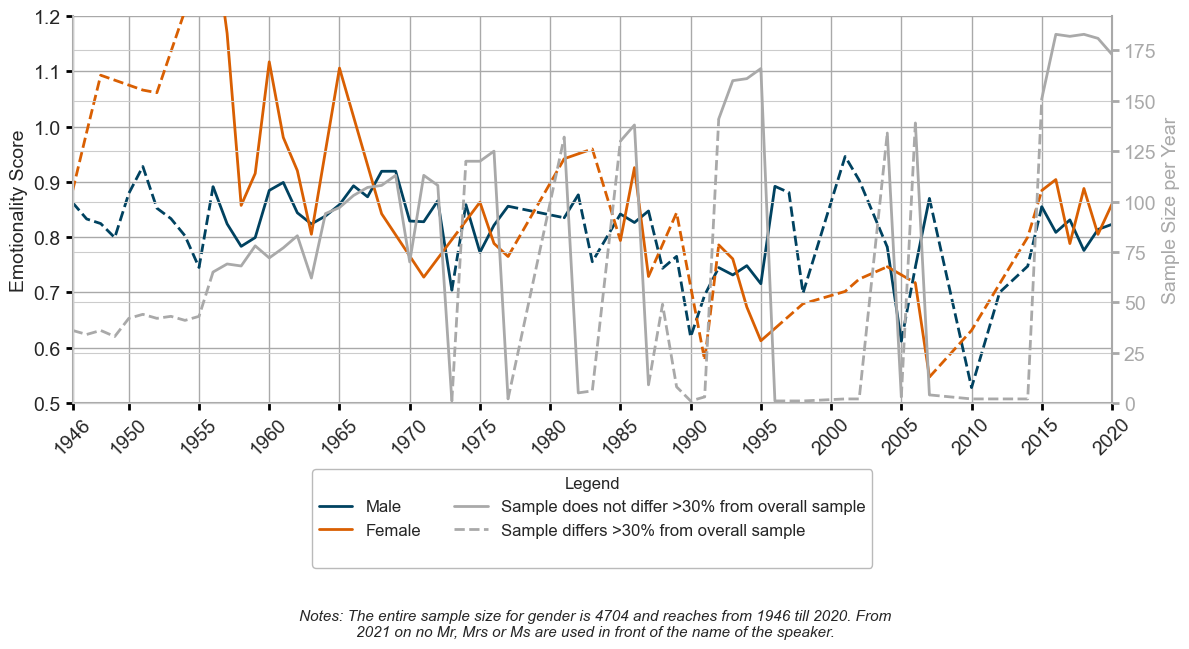

In [126]:
score_over_time_gender = (
    un_corpus_scored
    .groupby(['year', 'gender_dummy'])['score']
    .mean()
    .reset_index()
)
score_over_time_gender['gender_label'] = score_over_time_gender['gender_dummy'].map({0: 'Male', 1: 'Female'})
x_vals = gender_sample_size_per_year.index

male_scores = (
    score_over_time_gender[score_over_time_gender['gender_label']=='Male']
    .set_index('year')['score']
    .reindex(x_vals)
    .interpolate()  # fill gaps for continuous lines
)
female_scores = (
    score_over_time_gender[score_over_time_gender['gender_label']=='Female']
    .set_index('year')['score']
    .reindex(x_vals)
    .interpolate()
)
ref = gender_sample_size_per_year.reindex(x_vals).fillna(0).values

threshold = 0.3 * overall_sample_size_per_year.max()

fig, ax1 = plt.subplots(figsize=FIGSIZE)

# Conditional lines for Male/Female
plot_conditional_line(ax1, x_vals, male_scores.values, reference=ref, threshold=threshold, color=CUSTOM_COLORS[0])
plot_conditional_line(ax1, x_vals, female_scores.values, reference=ref, threshold=threshold, color=CUSTOM_COLORS[4])

# Axes labels, limits, ticks, grids, spines
ax1.set_xlabel("")
ax1.set_ylabel("Emotionality Score", fontsize=AXIS_LABEL_FONT_SIZE)
ax1.set_ylim(0.5,1.2)
ax1.set_xlim(1946, 2020)
# Manually define ticks only for this plot
tick_years = [1946] + list(range(1950, 2020, 5))
if 2020 not in tick_years:
    tick_years.append(2020)

ax1.set_xticks(tick_years)
ax1.set_xticklabels(tick_years, rotation=XTICK_ROTATION, fontsize=TICK_LABEL_FONT_SIZE)
ax1.tick_params(axis='y', which='both', left=True, right=False,
                direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH,
                color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE)
ax1.tick_params(axis='x', which='both', bottom=True, top=False,
                direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH,
                color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE)
ax1.spines['left'].set_color(SPINE_COLOR)
ax1.spines['left'].set_linewidth(SPINE_WIDTH)
ax1.spines['bottom'].set_color(SPINE_COLOR)
ax1.spines['bottom'].set_linewidth(SPINE_WIDTH)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.yaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)
ax1.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)


ax2 = ax1.twinx()
plot_conditional_line(ax2, x_vals, ref, reference=ref, threshold=threshold, color='darkgrey', linewidth=LINEWIDTH)
ax2.set_ylabel("Sample Size per Year", color='darkgrey', fontsize=AXIS_LABEL_FONT_SIZE)
ax2.tick_params(axis='y', colors='darkgrey', direction=TICK_DIRECTION,
                length=TICK_LENGTH, width=TICK_WIDTH, labelsize=TICK_LABEL_FONT_SIZE)
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color(SPINE_COLOR)
ax2.spines['right'].set_linewidth(SPINE_WIDTH)
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

sns.despine(left=False, right=False, top=True, bottom=False)

legend_handles = [
    Line2D([0], [0], color=CUSTOM_COLORS[0], lw=LINEWIDTH, label='Male'),
    Line2D([0], [0], color=CUSTOM_COLORS[4], lw=LINEWIDTH, label='Female'),
    Line2D([0], [0], color='white', lw=0, label=''), 

    Line2D([0], [0], color='darkgrey', lw=LINEWIDTH, linestyle='-', 
           label='Sample does not differ >30% from overall sample'),
    Line2D([0], [0], color='darkgrey', lw=LINEWIDTH, linestyle='--', 
           label='Sample differs >30% from overall sample')
]

ax1.legend(
    handles=legend_handles,
    title="Legend",
    title_fontsize=LEGEND_FONT_SIZE,
    fontsize=LEGEND_FONT_SIZE,
    loc=LEGEND_LOC,
    bbox_to_anchor=LEGEND_BBOX,
    ncol=2,
    frameon=True,
    edgecolor=SPINE_COLOR,
    facecolor='white'
)

note_text = (
    f"Notes: The entire sample size for gender is {gender_total} and reaches from 1946 till 2020. "
    f"From 2021 on no Mr, Mrs or Ms are used in front of the name of the speaker."
)
wrapped_text = "\n".join(textwrap.wrap(note_text, width=90))
plt.figtext(0.5, -0.07, wrapped_text, **FIG_NOTE_FONT)

plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'emotionality_score_over_time_gender.png'), bbox_inches='tight')
plt.show()


### Figure: Emotionality Scoring by english as official language

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

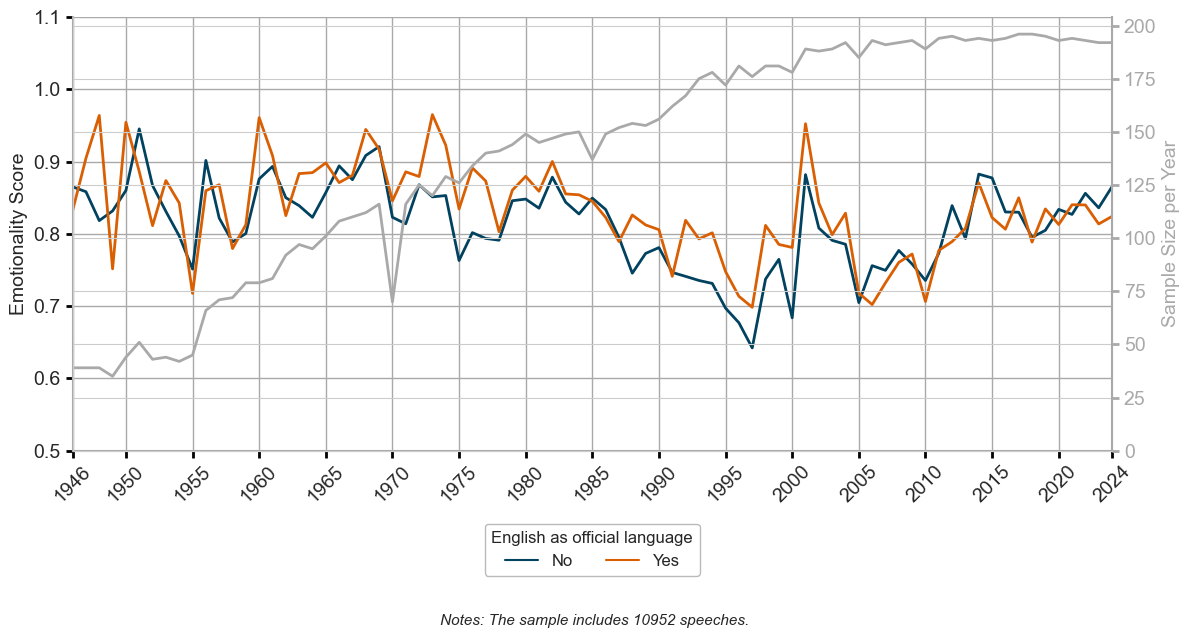

In [128]:
score_over_time_official_language = (
    un_corpus_scored
    .groupby(['year', 'english_official_language'])['score']
    .mean()
    .reset_index()
)
score_over_time_official_language['english_label'] = score_over_time_official_language['english_official_language'].map({0: 'No', 1: 'Yes'})

# PLot
fig, ax1 = plt.subplots(figsize=FIGSIZE)

sns.lineplot(
    data=score_over_time_official_language,
    x='year',
    y='score',
    hue='english_label',
    palette={'No': CUSTOM_COLORS[0], 'Yes': CUSTOM_COLORS[4]},
    linewidth=LINEWIDTH,
    ax=ax1
)

ax1.set_xlabel("")
ax1.set_ylabel("Emotionality Score", fontsize=AXIS_LABEL_FONT_SIZE)
ax1.set_ylim(Y_RANGE_EMOTIONALITY)
ax1.margins(y=AX_SET_Y_MARGIN)
ax1.set_xlim(1946, 2024)

tick_years_plot = [1946] + list(range(1950, 2025, 5))
if 2024 not in tick_years_plot:
    tick_years_plot.append(2024)

ax1.set_xticks(tick_years_plot)
ax1.set_xticklabels(tick_years_plot, rotation=XTICK_ROTATION, fontsize=TICK_LABEL_FONT_SIZE)

ax1.tick_params(axis='y', which='both', left=True, right=False,
                direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH,
                color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE)
ax1.tick_params(axis='x', which='both', bottom=True, top=False,
                direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH,
                color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE)

ax1.spines['left'].set_color(SPINE_COLOR)
ax1.spines['left'].set_linewidth(SPINE_WIDTH)
ax1.spines['bottom'].set_color(SPINE_COLOR)
ax1.spines['bottom'].set_linewidth(SPINE_WIDTH)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.yaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)
ax1.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)

ax2 = ax1.twinx()
x2, y2 = official_language_sample_size_per_year.index, official_language_sample_size_per_year.values
sns.lineplot(
    x=x2,
    y=y2,
    color='darkgrey',
    linewidth=LINEWIDTH,
    ax=ax2
)

ax2.set_ylabel("Sample Size per Year", color='darkgrey', fontsize=AXIS_LABEL_FONT_SIZE)
ax2.tick_params(axis='y', colors='darkgrey', direction=TICK_DIRECTION,
                length=TICK_LENGTH, width=TICK_WIDTH, labelsize=TICK_LABEL_FONT_SIZE)
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color(SPINE_COLOR)
ax2.spines['right'].set_linewidth(SPINE_WIDTH)
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

ax1.legend(
    title="English as official language",
    title_fontsize=LEGEND_FONT_SIZE,
    fontsize=LEGEND_FONT_SIZE,
    loc=LEGEND_LOC,
    bbox_to_anchor=LEGEND_BBOX,
    ncol=LEGEND_NCOL,
    frameon=True,
    edgecolor=SPINE_COLOR,
    facecolor='white'
)

note_text = (
    f"Notes: The sample includes {overall_total} speeches."
)
wrapped_text = "\n".join(textwrap.wrap(note_text, width=100))
plt.figtext(0.5, -0.05, wrapped_text, **FIG_NOTE_FONT)

sns.despine(left=False, right=False, top=True, bottom=False)
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)

plt.savefig(os.path.join(fig_dir, 'emotionality_score_over_time_english_official_language.png'), bbox_inches='tight')
plt.show()

### Figure: Emotionality Scoring by Speaker Position

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

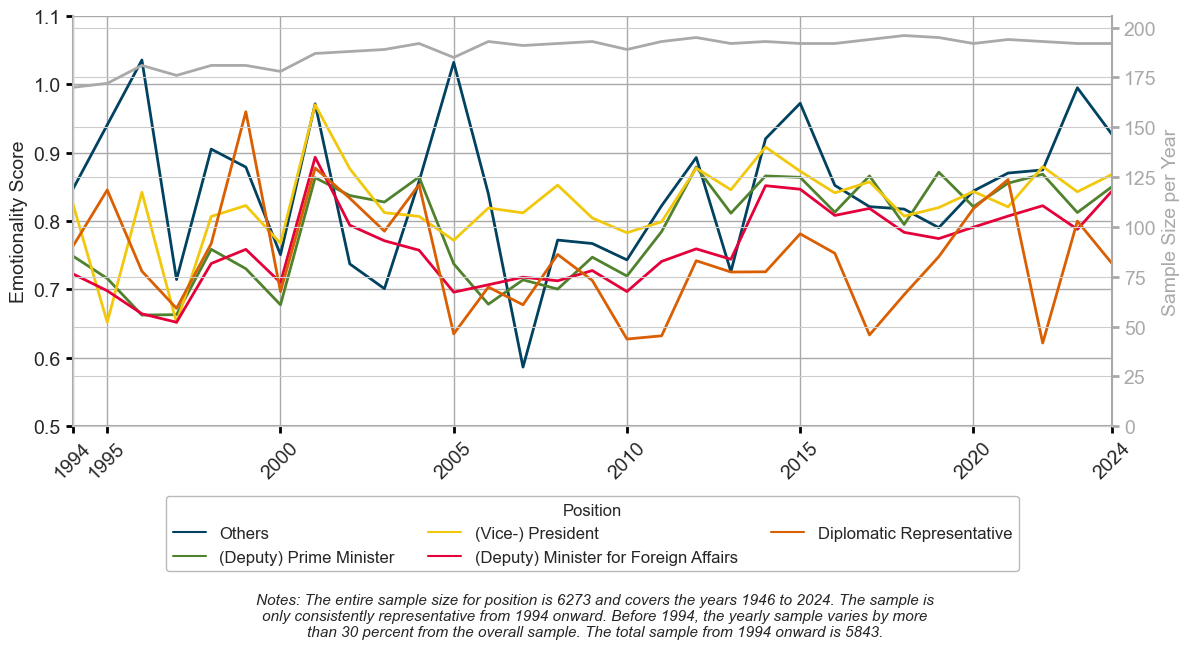

In [134]:
score_over_time_position = (
    un_corpus_scored
    .groupby(['year', 'position'])['score']
    .mean()
    .reset_index()
)

score_over_time_position['position'] = score_over_time_position['position'].astype(str)

position_sample_size_per_year = (
    un_corpus_scored.groupby('year')['position'].count()
)

position_total = position_sample_size_per_year.sum()

fig, ax1 = plt.subplots(figsize=FIGSIZE)

sns.lineplot(
    data=score_over_time_position,
    x='year',
    y='score',
    hue='position',
    palette=CUSTOM_COLORS,
    linewidth=LINEWIDTH,
    ax=ax1
)

ax1.set_xlabel("")
ax1.set_ylabel("Emotionality Score", fontsize=AXIS_LABEL_FONT_SIZE)
ax1.set_ylim(Y_RANGE_EMOTIONALITY)
ax1.margins(y=AX_SET_Y_MARGIN)
ax1.set_xlim(1994, 2024)

tick_years_position = [1994] + list(range(1995, 2025, 5))
if 2024 not in tick_years_position:
    tick_years_position.append(2024)
ax1.set_xticks(tick_years_position)
ax1.set_xticklabels(tick_years_position, rotation=XTICK_ROTATION, fontsize=TICK_LABEL_FONT_SIZE)

ax1.tick_params(axis='y', which='both', left=True, right=False,
                direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH,
                color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE)
ax1.tick_params(axis='x', which='both', bottom=True, top=False,
                direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH,
                color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE)

ax1.spines['left'].set_color(SPINE_COLOR)
ax1.spines['left'].set_linewidth(SPINE_WIDTH)
ax1.spines['bottom'].set_color(SPINE_COLOR)
ax1.spines['bottom'].set_linewidth(SPINE_WIDTH)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.yaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)
ax1.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)

ax2 = ax1.twinx()
sns.lineplot(
    x=position_sample_size_per_year.index,
    y=position_sample_size_per_year.values,
    color='darkgrey',
    linewidth=LINEWIDTH,  
    ax=ax2
)
ax2.set_ylabel("Sample Size per Year", color='darkgrey', fontsize=AXIS_LABEL_FONT_SIZE)
ax2.tick_params(axis='y', colors='darkgrey', direction=TICK_DIRECTION,
                length=TICK_LENGTH, width=TICK_WIDTH, labelsize=TICK_LABEL_FONT_SIZE)
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color(SPINE_COLOR)
ax2.spines['right'].set_linewidth(SPINE_WIDTH)
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

ax1.legend(
    title="Position",
    title_fontsize=LEGEND_FONT_SIZE,
    fontsize=LEGEND_FONT_SIZE,
    loc=LEGEND_LOC,
    bbox_to_anchor=LEGEND_BBOX,
    ncol=LEGEND_NCOL,
    frameon=True,
    edgecolor=SPINE_COLOR,
    facecolor='white'
)

note_text = (
    f"Notes: The entire sample size for position is {position_total} and covers the years 1946 to 2024. "
    f"The sample is only consistently representative from 1994 onward. Before 1994, the yearly sample varies "
    f"by more than 30 percent from the overall sample. The total sample from 1994 onward is {position_total_representative}.")
wrapped_text = "\n".join(textwrap.wrap(note_text, width=100))
plt.figtext(0.5, -0.07, wrapped_text, **FIG_NOTE_FONT)

sns.despine(left=False, right=False, top=True, bottom=False)
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'emotionality_score_over_time_position.png'), bbox_inches='tight')
plt.show()

## Additional Figures: Cosine Similiarty of Words to the Centroids

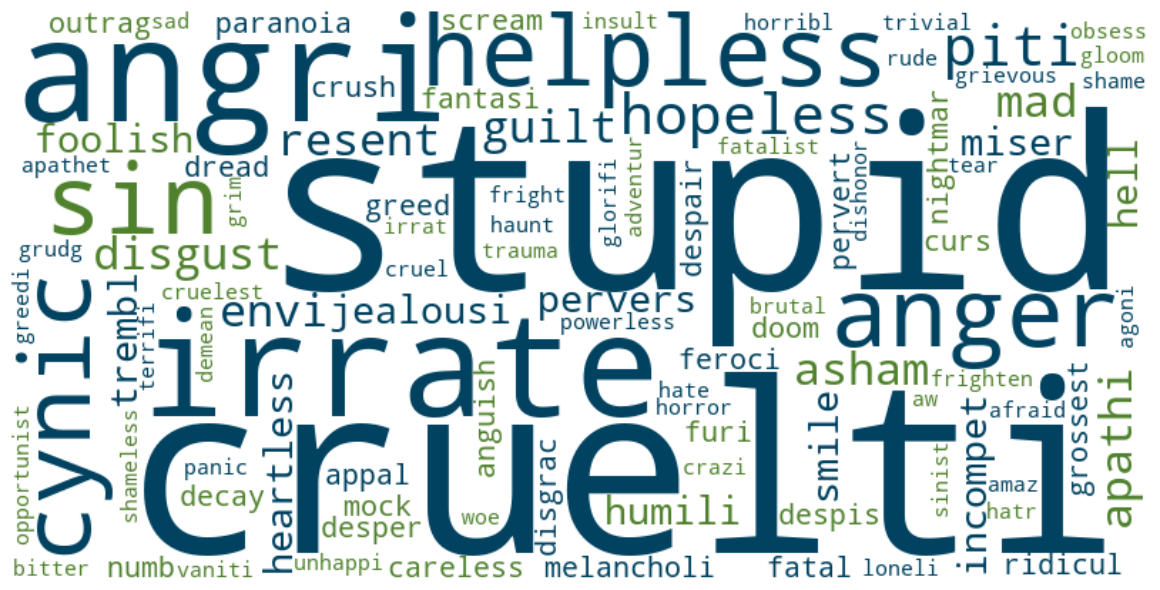

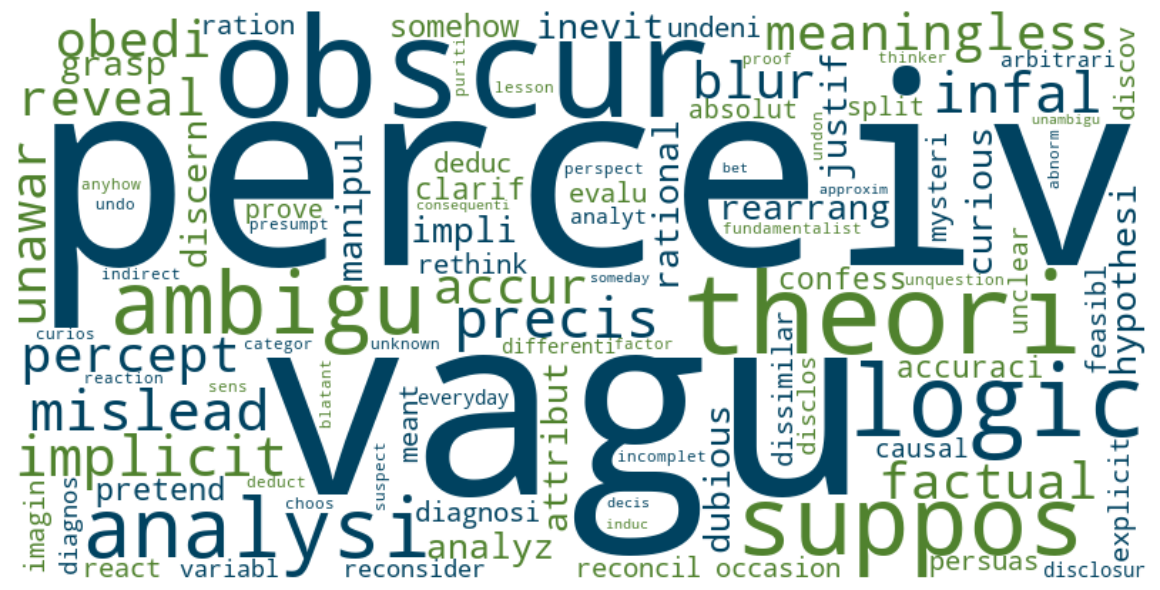

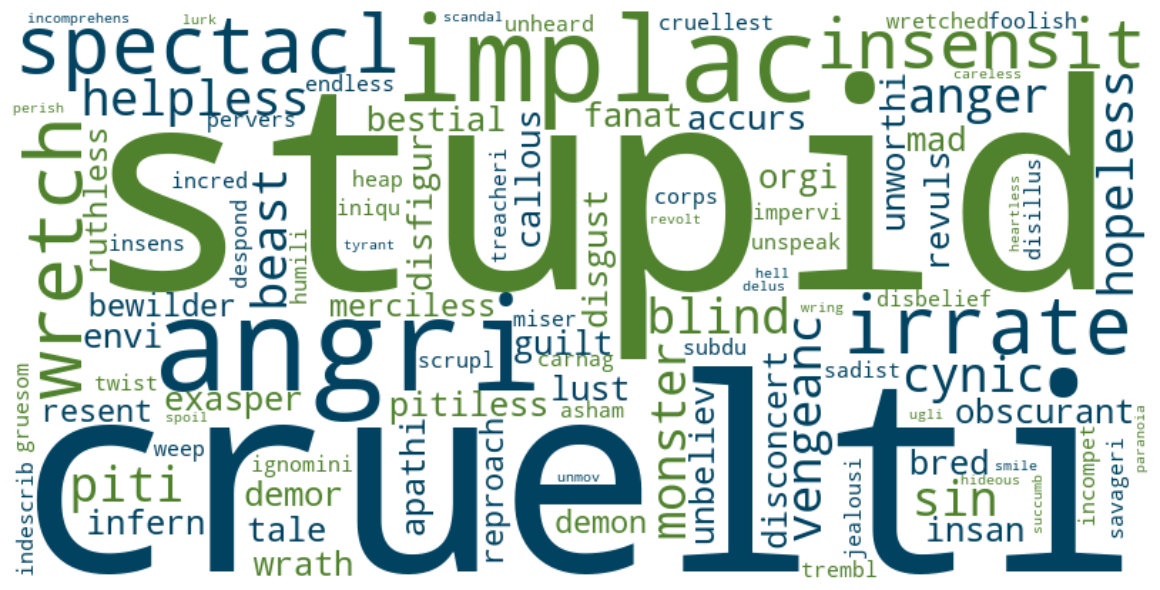

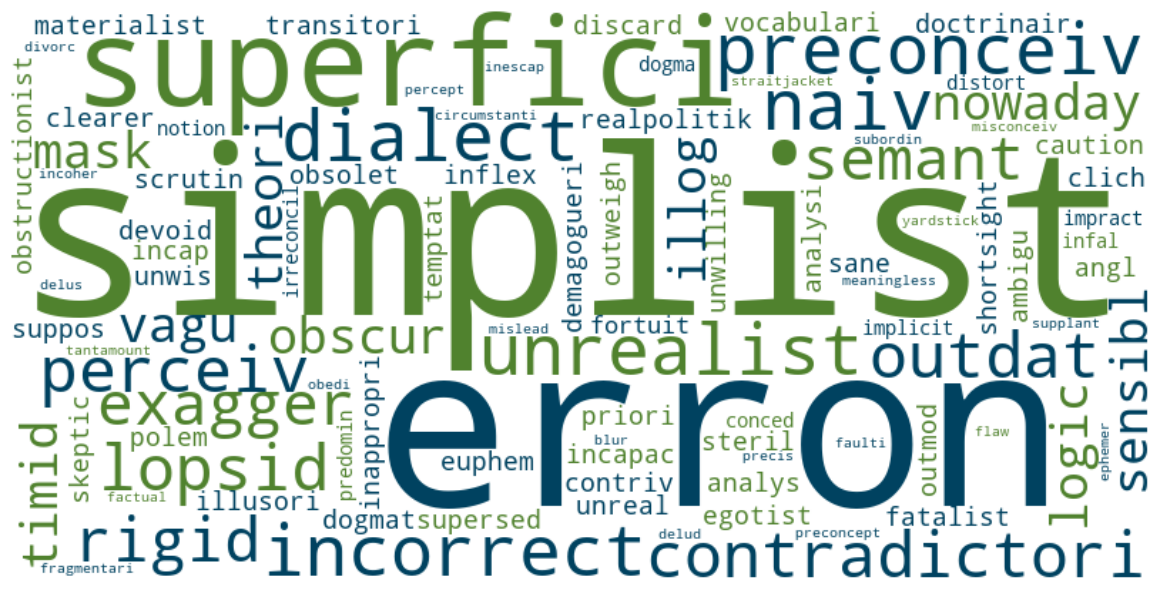

In [136]:
def word_similarity_to_centroid(word_list, centroid, model):
    similarities = {}
    for word in word_list:
        if word in model.wv:
            word_vec = model.wv[word]
            sim = 1 - cosine(word_vec, centroid)  # similarity = 1 - cosine distance
            similarities[word] = sim
    return similarities

# Cosine Similarity of affect dictionary to affect centroid
affect_dict_sim = word_similarity_to_centroid(affect_dic, affect_centroid, w2v)

# Cosine Similarity of cognition dictionary to cognition centroid
cognition_dict_sim = word_similarity_to_centroid(cognition_dic, cognition_centroid, w2v)

# Cosine Similarity of corpus words to affect centroid
corpus_words_sim_affect = word_similarity_to_centroid(corpus_words, affect_centroid, w2v)

# Cosine Similarity of corpus words to cognition centroid
corpus_words_sim_cognition = word_similarity_to_centroid(corpus_words, cognition_centroid, w2v)


def plot_wordcloud_from_sim(sim_dict, filename, top_n=100):
    sim_sorted = dict(sorted(sim_dict.items(), key=lambda x: x[1], reverse=True)[:top_n])

    colors_wordclouds = ['#50822E', '#004260']
    def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
        return random.choice(colors_wordclouds)

    wc = WordCloud(width=800, height=400, background_color='white', color_func=color_func)
    wc.generate_from_frequencies(sim_sorted)

    plt.figure(figsize=FIGSIZE)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout()
    
    os.makedirs(fig_dir, exist_ok=True)
    plt.savefig(os.path.join(fig_dir, filename), bbox_inches='tight')
    plt.show()
#  Wordcloud highest cosine similarity of affect dictionary to affect centroid
plot_wordcloud_from_sim(affect_dict_sim, "affect_dict_wordcloud.png")

# Wordcloud highest cosine similarity of cognition dictionary to cognition centroid
plot_wordcloud_from_sim(cognition_dict_sim, "cognition_dict_wordcloud.png")

# Wordcloud highest cosine similarity of corpus words to affect centroid
plot_wordcloud_from_sim(corpus_words_sim_affect, "corpus_affect_wordcloud.png")

# Wordcloud highest cosine similarity of corpus words to cognition centroid
plot_wordcloud_from_sim(corpus_words_sim_cognition, "corpus_cognition_wordcloud.png")

## Additional Figures: Emotionality when adjusting stopwords or removing lower frequency words

### Figure: Emotionality Scoring over time (Individual Stopwords List)

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

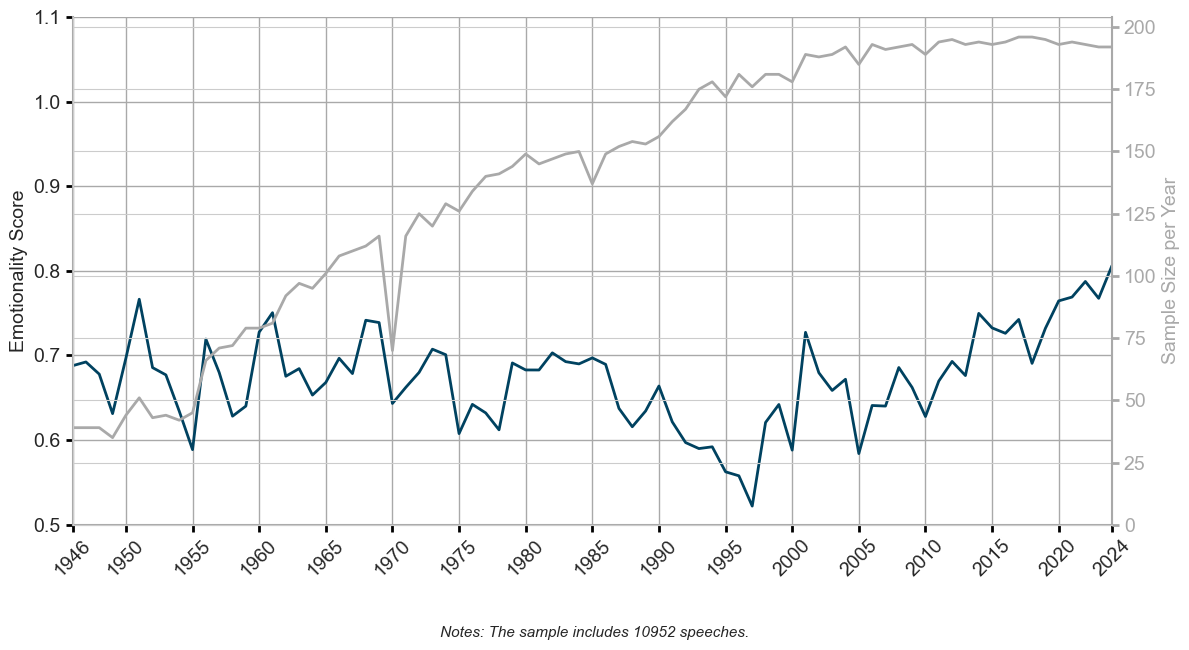

In [210]:
# Mean score per year
score_over_time = ind_stopwords_un_corpus_scored.groupby('year')['score'].mean()

fig, ax1 = plt.subplots(figsize=FIGSIZE)

x = score_over_time.index
y = score_over_time.values

sns.lineplot(
    x=x,
    y=y,
    marker=MARKER,
    color=CUSTOM_COLORS[0],
    linewidth=LINEWIDTH,
    ax=ax1
)

ax1.set_xlabel("")
ax1.set_ylabel("Emotionality Score", fontsize=AXIS_LABEL_FONT_SIZE)
ax1.set_ylim(Y_RANGE_EMOTIONALITY)
ax1.margins(y=AX_SET_Y_MARGIN)

ax1.set_xlim(1946, 2024)
ax1.set_xticks(TICK_YEARS)
ax1.set_xticklabels(TICK_YEARS, rotation=XTICK_ROTATION, fontsize=TICK_LABEL_FONT_SIZE)

ax1.tick_params(
    axis='y', which='both', left=True, right=False,
    direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH,
    color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE
)
ax1.tick_params(
    axis='x', which='both', bottom=True, top=False,
    direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH,
    color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE
)


ax1.spines['left'].set_color(SPINE_COLOR)
ax1.spines['left'].set_linewidth(SPINE_WIDTH)
ax1.spines['bottom'].set_color(SPINE_COLOR)
ax1.spines['bottom'].set_linewidth(SPINE_WIDTH)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.yaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)
ax1.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)


ax2 = ax1.twinx()
x2 = overall_sample_size_per_year.index
y2 = overall_sample_size_per_year.values

sns.lineplot(
    x=x2,
    y=y2,
    color='darkgrey',
    linewidth=LINEWIDTH,
    ax=ax2
)
ax2.set_ylabel("Sample Size per Year", color='darkgrey', fontsize=AXIS_LABEL_FONT_SIZE)
ax2.tick_params(
    axis='y', colors='darkgrey', direction=TICK_DIRECTION,
    length=TICK_LENGTH, width=TICK_WIDTH, labelsize=TICK_LABEL_FONT_SIZE
)
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color(SPINE_COLOR)
ax2.spines['right'].set_linewidth(SPINE_WIDTH)
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

sns.despine(left=False, right=False, top=True, bottom=False)

note_text = (
    f"Notes: The sample includes {overall_total} speeches."
)
wrapped_text = "\n".join(textwrap.wrap(note_text, width=100))
plt.figtext(0.5, -0.07, wrapped_text, **FIG_NOTE_FONT)

plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'emotionality_score_over_time_ind_stopwords.png'), bbox_inches='tight')
plt.show()

### Figure: Emotionality Scoring over time (Excluding low frequency words for weighting)

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

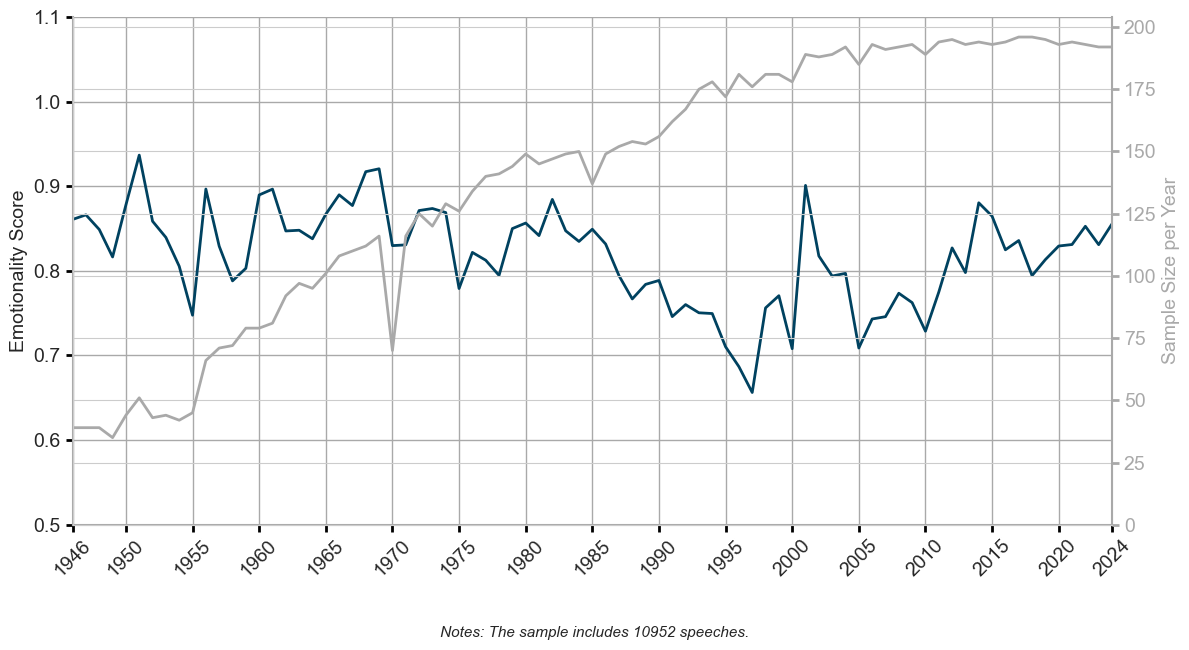

In [203]:
# Mean score per year
score_over_time = removed_lowfreq_words_un_corpus_scored.groupby('year')['score'].mean()

fig, ax1 = plt.subplots(figsize=FIGSIZE)

x = score_over_time.index
y = score_over_time.values

sns.lineplot(
    x=x,
    y=y,
    marker=MARKER,
    color=CUSTOM_COLORS[0],
    linewidth=LINEWIDTH,
    ax=ax1
)

ax1.set_xlabel("")
ax1.set_ylabel("Emotionality Score", fontsize=AXIS_LABEL_FONT_SIZE)
ax1.set_ylim(Y_RANGE_EMOTIONALITY)
ax1.margins(y=AX_SET_Y_MARGIN)

ax1.set_xlim(1946, 2024)
ax1.set_xticks(TICK_YEARS)
ax1.set_xticklabels(TICK_YEARS, rotation=XTICK_ROTATION, fontsize=TICK_LABEL_FONT_SIZE)

ax1.tick_params(
    axis='y', which='both', left=True, right=False,
    direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH,
    color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE
)
ax1.tick_params(
    axis='x', which='both', bottom=True, top=False,
    direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH,
    color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE
)


ax1.spines['left'].set_color(SPINE_COLOR)
ax1.spines['left'].set_linewidth(SPINE_WIDTH)
ax1.spines['bottom'].set_color(SPINE_COLOR)
ax1.spines['bottom'].set_linewidth(SPINE_WIDTH)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax1.yaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)
ax1.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)


ax2 = ax1.twinx()
x2 = overall_sample_size_per_year.index
y2 = overall_sample_size_per_year.values

sns.lineplot(
    x=x2,
    y=y2,
    color='darkgrey',
    linewidth=LINEWIDTH,
    ax=ax2
)
ax2.set_ylabel("Sample Size per Year", color='darkgrey', fontsize=AXIS_LABEL_FONT_SIZE)
ax2.tick_params(
    axis='y', colors='darkgrey', direction=TICK_DIRECTION,
    length=TICK_LENGTH, width=TICK_WIDTH, labelsize=TICK_LABEL_FONT_SIZE
)
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color(SPINE_COLOR)
ax2.spines['right'].set_linewidth(SPINE_WIDTH)
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

sns.despine(left=False, right=False, top=True, bottom=False)

note_text = (
    f"Notes: The sample includes {overall_total} speeches."
)
wrapped_text = "\n".join(textwrap.wrap(note_text, width=100))
plt.figtext(0.5, -0.07, wrapped_text, **FIG_NOTE_FONT)

plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'emotionality_score_over_time_removed_lowfreq_words.png'), bbox_inches='tight')
plt.show()